# Divvy Modeling Smooth
- TBATS
- Double-Seasonal Holt-Winters
- Auto-Arima (with Fourier)
- Prophet

In [2]:
install.packages('xts')
library(xts)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [3]:
install.packages('forecast')
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [4]:
install.packages('TSA')
library(TSA)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘leaps’, ‘locfit’


Registered S3 methods overwritten by 'TSA':
  method       from    
  fitted.Arima forecast
  plot.Arima   forecast


Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar




In [5]:
install.packages('tseries')
library(tseries)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
install.packages('prophet')
library(prophet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘matrixStats’, ‘htmlwidgets’, ‘inline’, ‘gridExtra’, ‘loo’, ‘dygraphs’, ‘extraDistr’, ‘RcppParallel’, ‘rstan’, ‘rstantools’, ‘StanHeaders’, ‘BH’, ‘RcppEigen’


Loading required package: Rcpp

Loading required package: rlang



In [7]:
In_result <- read.csv('/content/df_ts_in_1721_Station_Daily_F_results.csv',header=TRUE)
df_in_ts  <- read.csv('/content/df_ts_in_1721_Station_Daily.csv',header=TRUE)
Out_result <- read.csv('/content/df_ts_out_1721_Station_Daily_F_results.csv',header=TRUE)
df_out_ts  <- read.csv('/content/df_ts_out_1721_Station_Daily.csv',header=TRUE)

In [8]:
In_result[order(In_result$CV2)[1:3],]

X   stations                   ADI      CV2       forecastability
163 162 Dearborn St & Monroe St    1.002941 0.3146177 Smooth         
303 302 Kingsbury St & Kinzie St   1.002352 0.3271629 Smooth         
705 704 Clybourn Ave & Division St 1.005900 0.3384438 Smooth

In [9]:
Out_result[order(In_result$CV2)[1:3],]

X   stations                   ADI      CV2       forecastability
163 162 Dearborn St & Monroe St    1.002352 0.3310096 Smooth         
303 302 Kingsbury St & Kinzie St   1.002352 0.3298335 Smooth         
705 704 Clybourn Ave & Division St 1.007683 0.3585908 Smooth

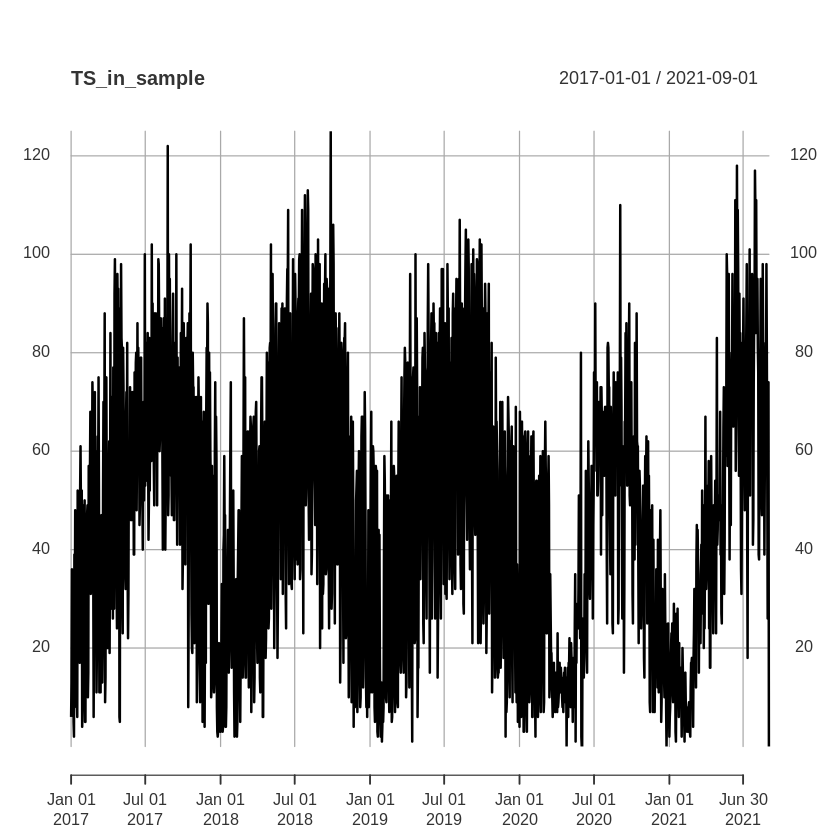

In [10]:
TS_in_sample <- xts(df_in_ts$Dearborn.St...Monroe.St,
                  order.by = as.Date(df_in_ts$date))
plot(TS_in_sample)

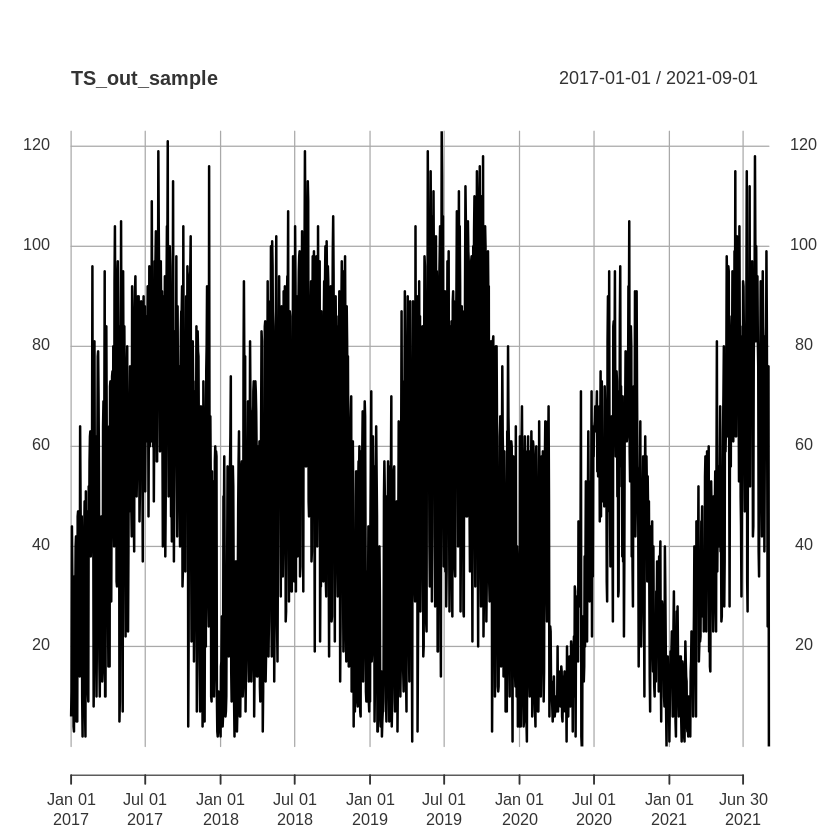

In [11]:
TS_out_sample <- xts(df_out_ts$Dearborn.St...Monroe.St,
                  order.by = as.Date(df_out_ts$date))
plot(TS_out_sample)

In [12]:
TS_in_train <- ts(TS_in_sample['/2018'],frequency=365,start=c(2017,1))
TS_in_test <- ts(TS_out_sample['2018/2020'],frequency=365,start=c(2019,1),end=c(2020,1)) #start=c(2021
TS_out_train <- ts(TS_out_sample['/2018'],frequency=365,start=c(2017,1))
TS_out_test <- ts(TS_out_sample['2018/2020'],frequency=365,start=c(2019,1),end=c(2020,1)) #start=c(2021
TS_in_postcovid <- ts(TS_in_sample['2020/'],frequency=365,start=c(2020,1))
TS_out_postcovid <- ts(TS_out_sample['2020/'],frequency=365,start=c(2020,1))

[1] "Annual seasonality is observed"


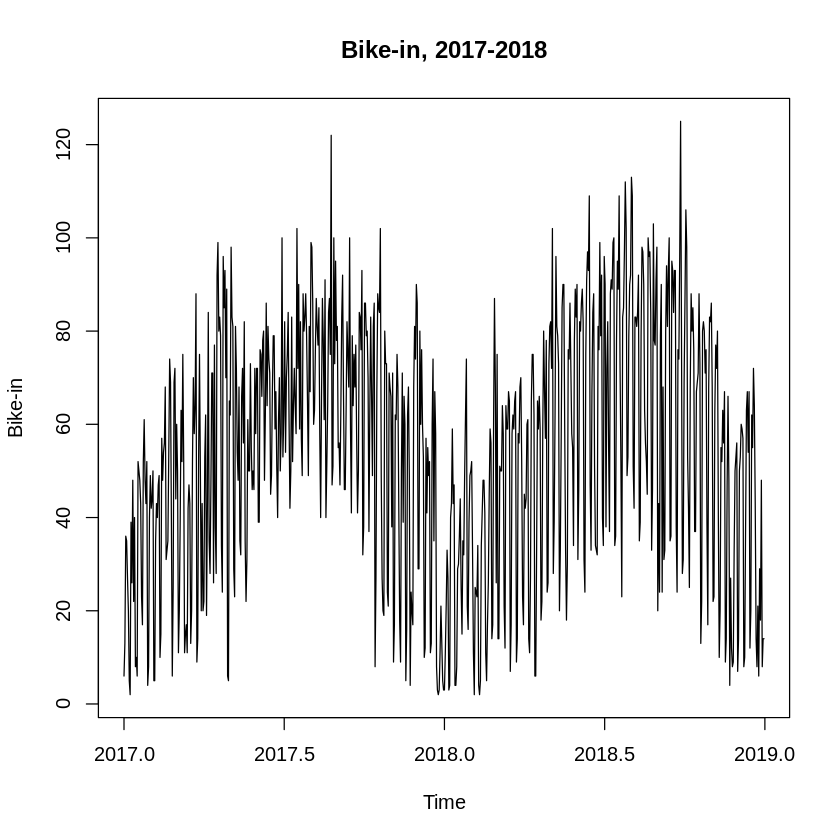

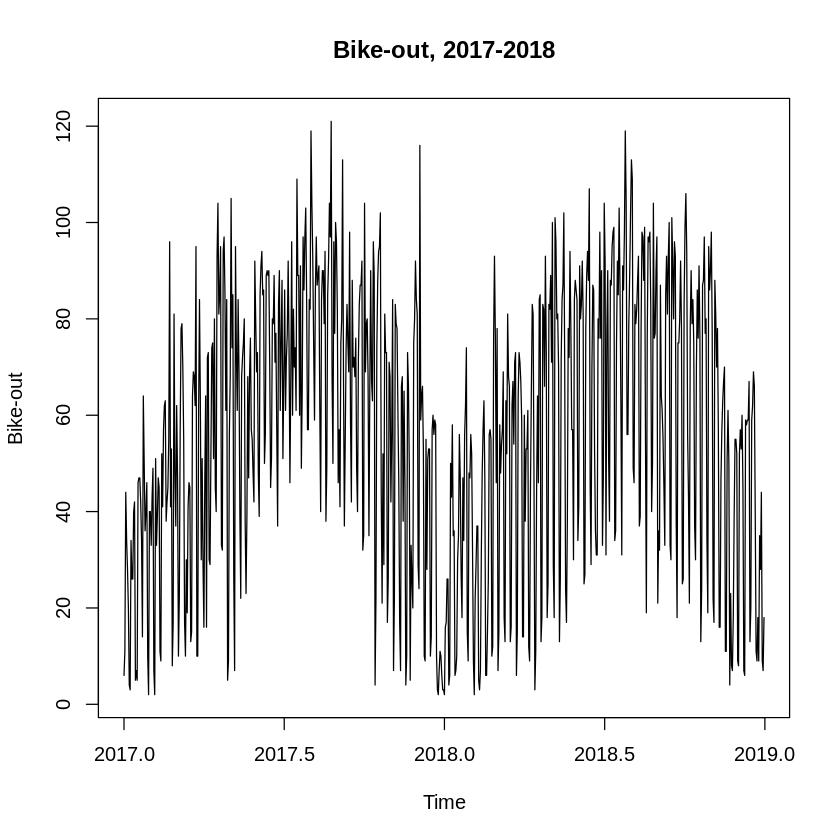

In [ ]:
print('Annual seasonality is observed')
plot(TS_in_train, main='Bike-in, 2017-2018',ylab='Bike-in')
plot(TS_out_train, main='Bike-out, 2017-2018',ylab='Bike-out')

[1] "Monthly seasonality is not clearly observed, need to check further"


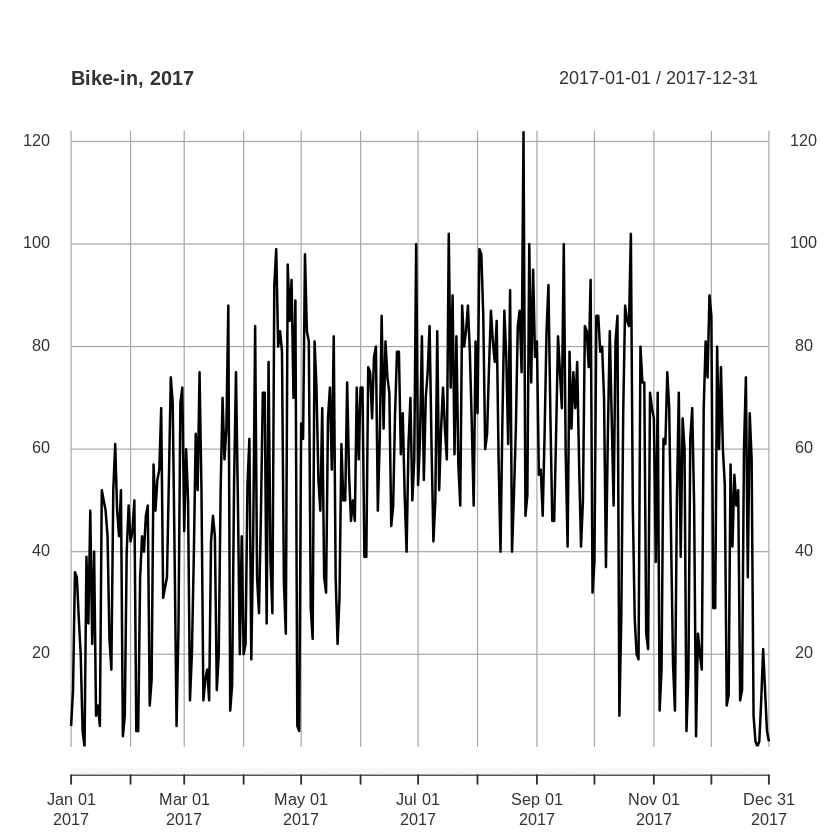

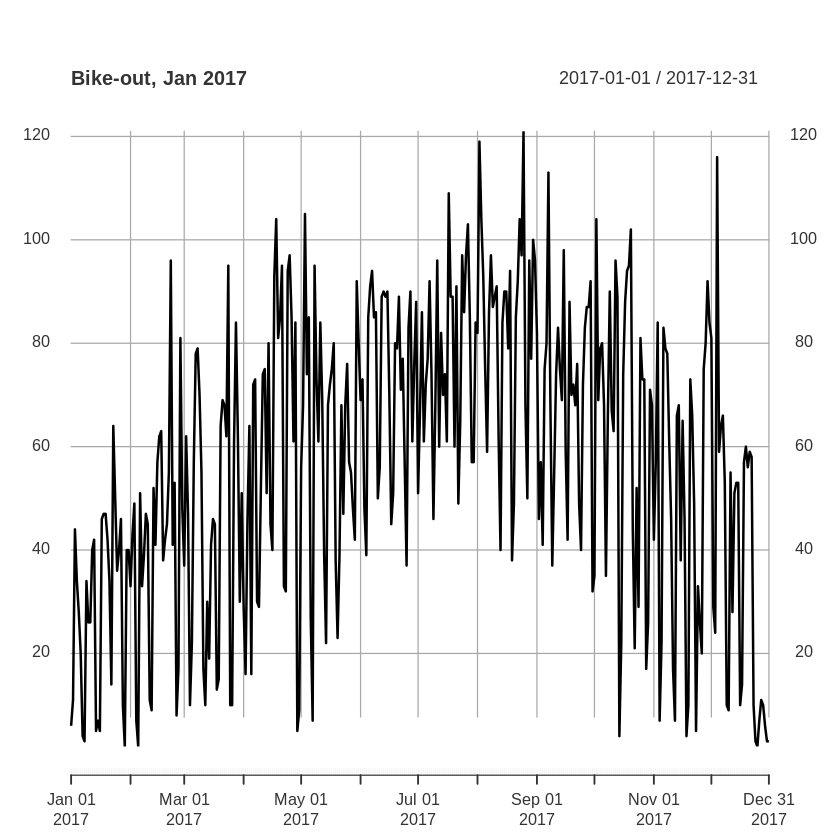

In [ ]:
print('Monthly seasonality is not clearly observed, need to check further')
plot(TS_in_sample['/2017-12-31'], main='Bike-in, 2017')
plot(TS_out_sample['/2017-12-31'], main='Bike-out, Jan 2017')

[1] "Weekly seasonality is observed"


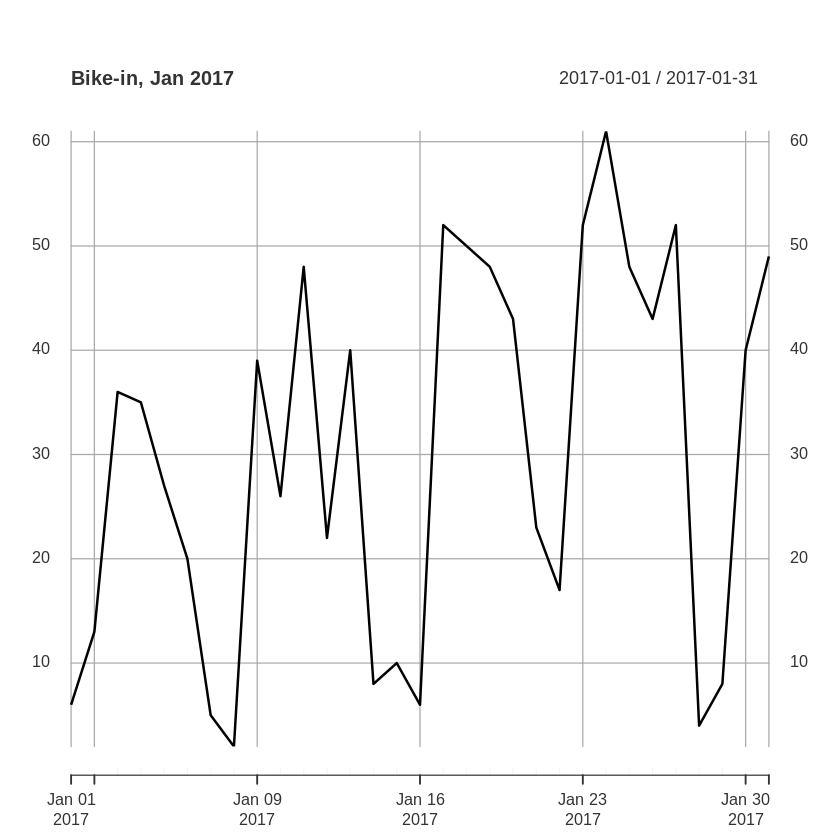

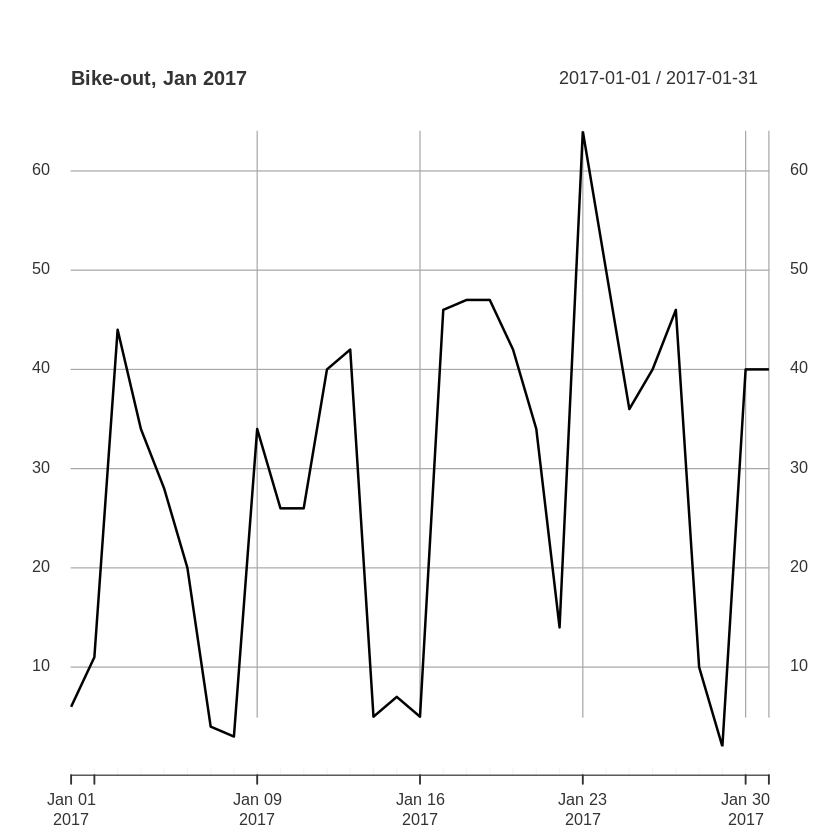

In [ ]:
print('Weekly seasonality is observed')
plot(TS_in_sample['/2017-01-31'], main='Bike-in, Jan 2017')
plot(TS_out_sample['/2017-01-31'], main='Bike-out, Jan 2017')

[1] "Daily seasonality is not observed, as the data is daily"


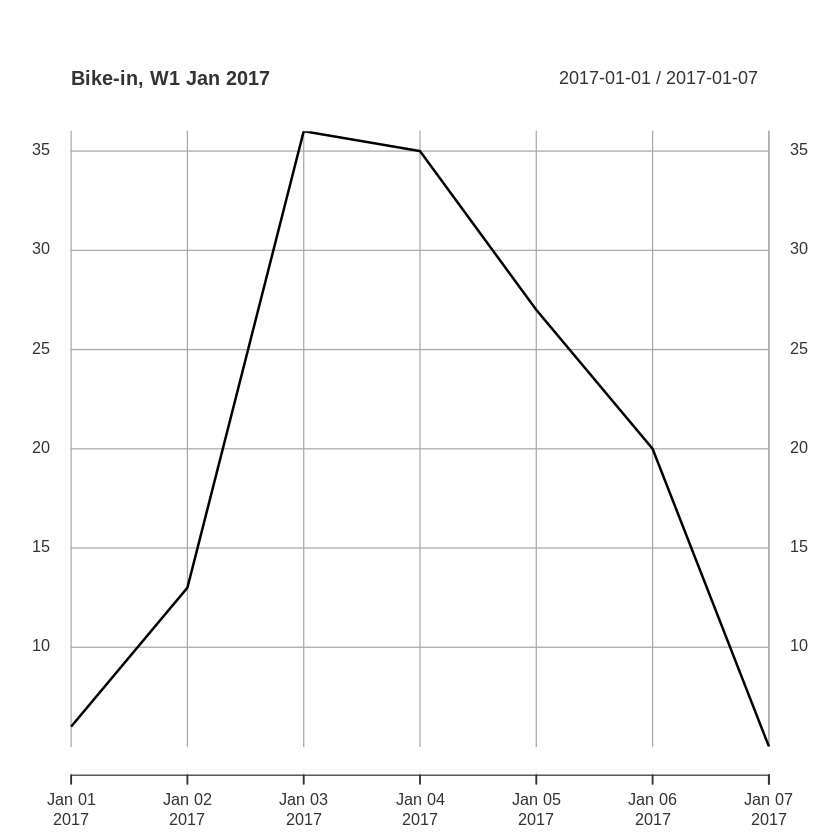

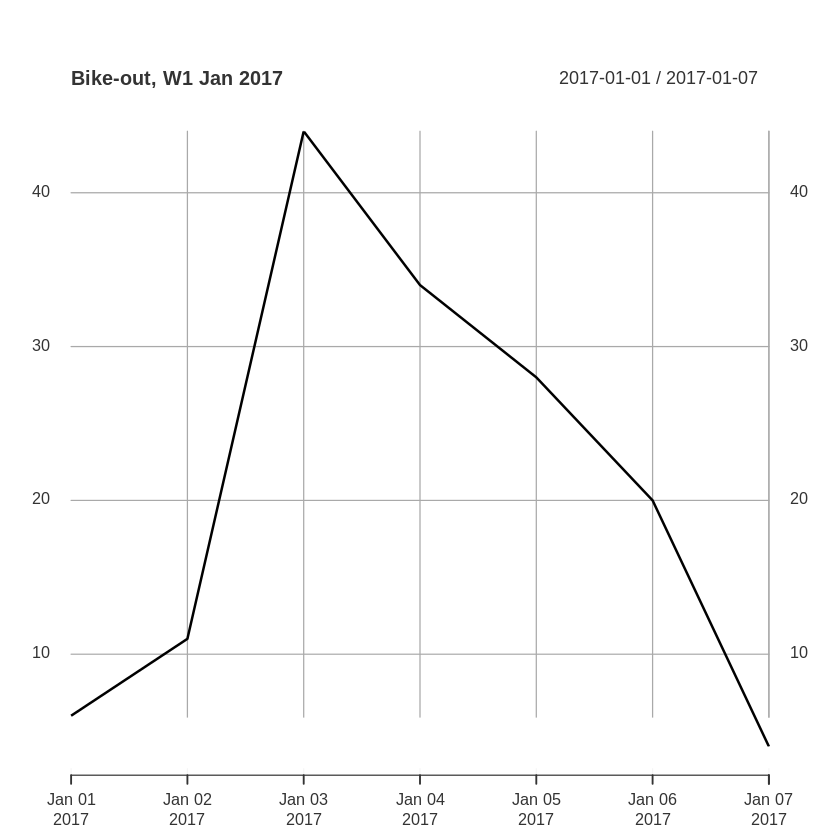

In [ ]:
print('Daily seasonality is not observed, as the data is daily')
plot(TS_in_sample['/2017-01-07'], main='Bike-in, W1 Jan 2017')
plot(TS_out_sample['/2017-01-07'], main='Bike-out, W1 Jan 2017')

[1] "Annual seasonality decomposition for 2-year period"


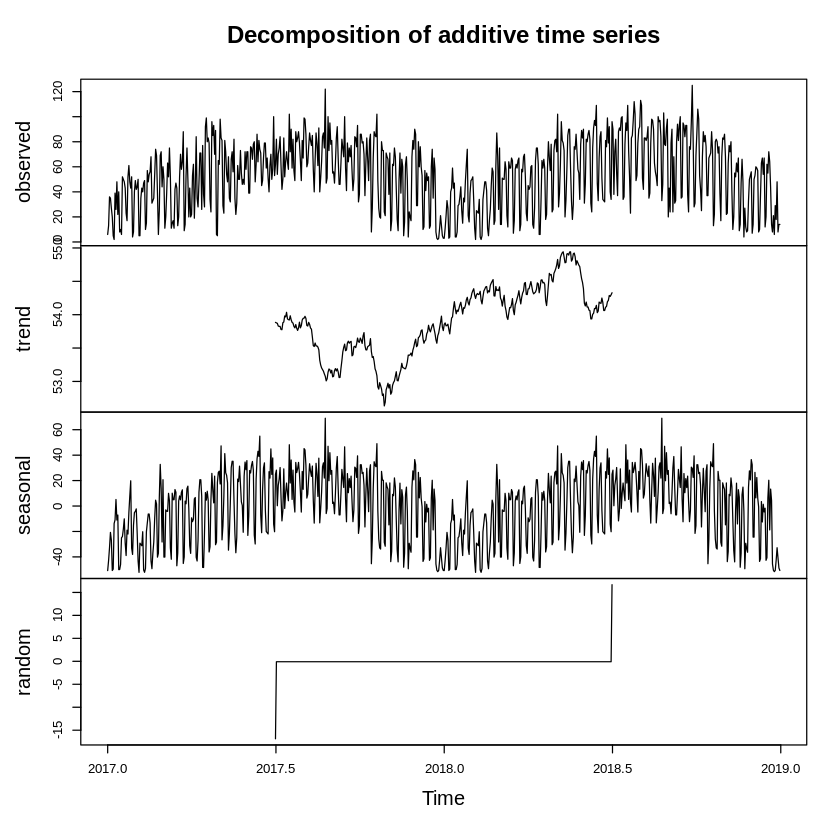

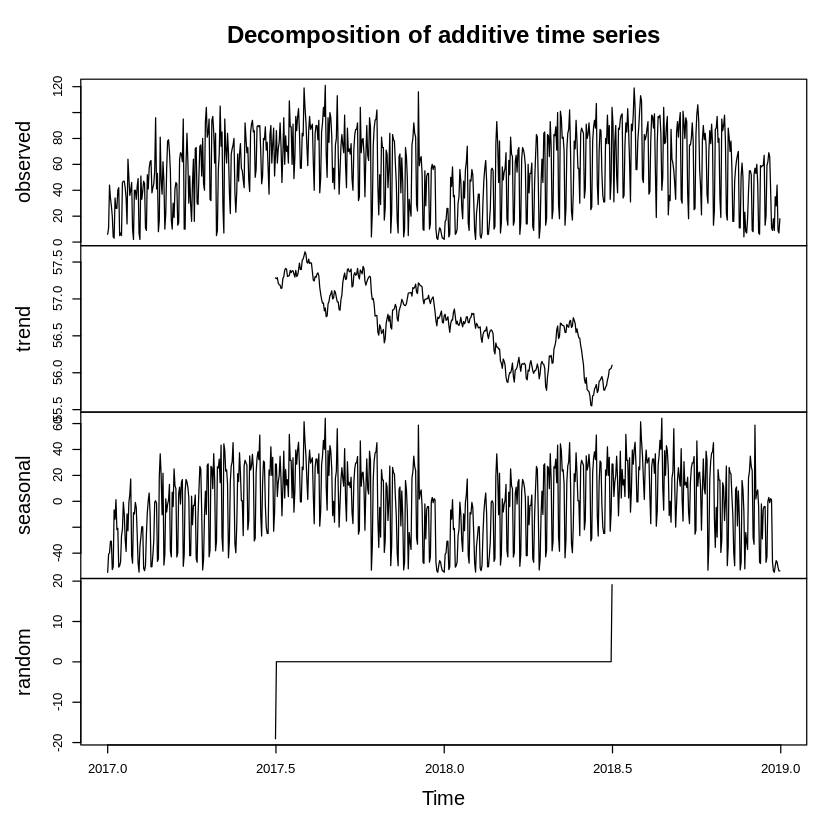

In [ ]:
print('Annual seasonality decomposition for 2-year period')
plot(decompose(TS_in_train))
plot(decompose(TS_out_train))

[1] "Monthly decomposition for 2017"


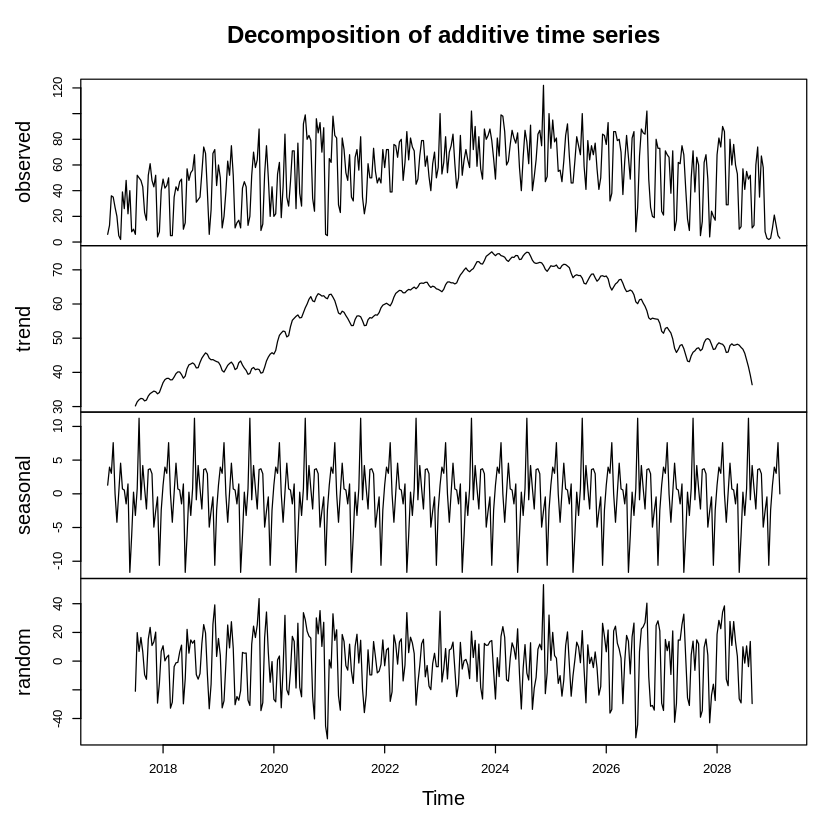

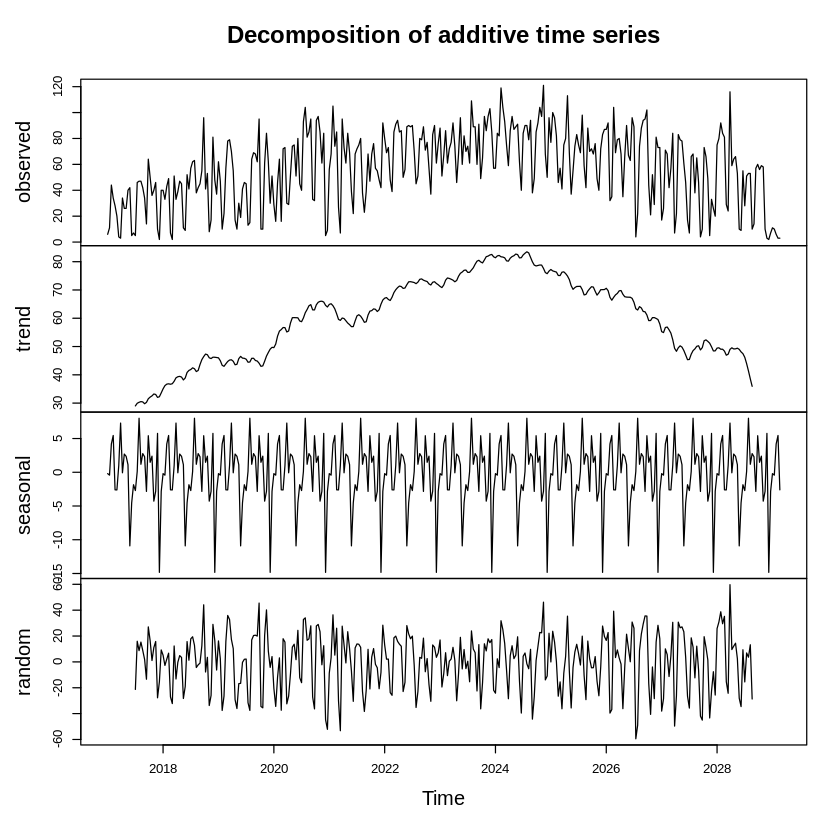

In [ ]:
print("Monthly decomposition for 2017")
plot(decompose(ts(TS_in_sample['/2017-12-31'],frequency=30,start=c(2017,1,1))))
plot(decompose(ts(TS_out_sample['/2017-12-31'],frequency=30,start=c(2017,1,1))))

[1] "Weekly seasonality decomposition for Jan 2017"


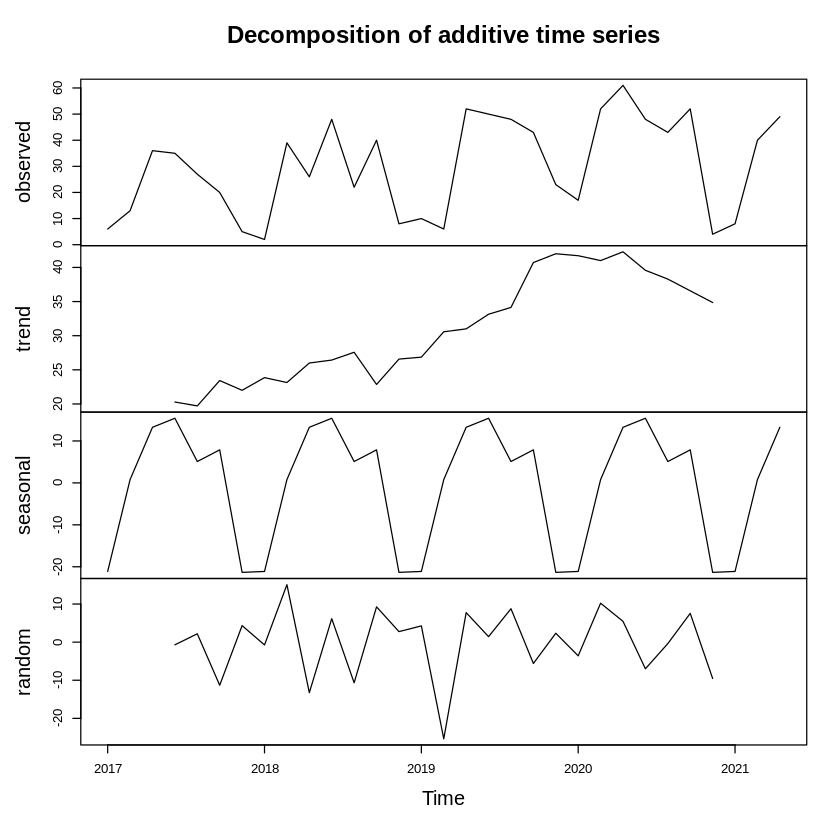

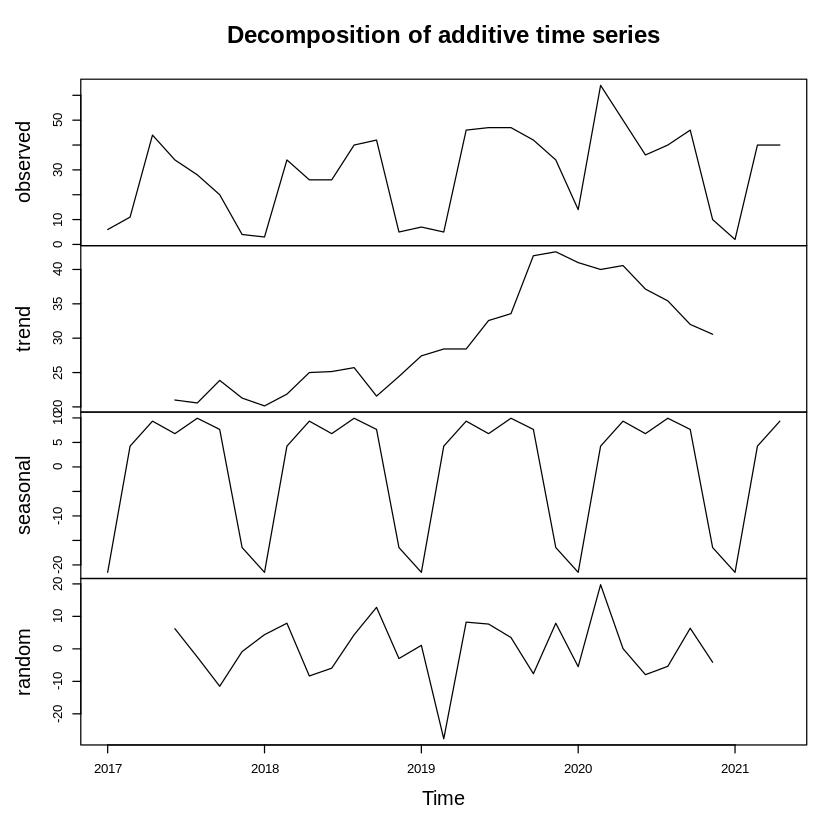

In [ ]:
print("Weekly seasonality decomposition for Jan 2017")
plot(decompose(ts(TS_in_sample['/2017-01-31'],frequency=7,start=c(2017,1,1))))
plot(decompose(ts(TS_out_sample['/2017-01-31'],frequency=7,start=c(2017,1,1))))

In [ ]:
print("Daily seasonality decomposition for W1 Jan 2017 - cannot be performed")
#plot(decompose(ts(TS_in_sample['/2017-01-07'],frequency=1,start=c(2017,1,1))))
#plot(decompose(ts(TS_out_sample['/2017-01-07'],frequency=1,start=c(2017,1,1))))

[1] "Daily seasonality decomposition for W1 Jan 2017 - cannot be performed"


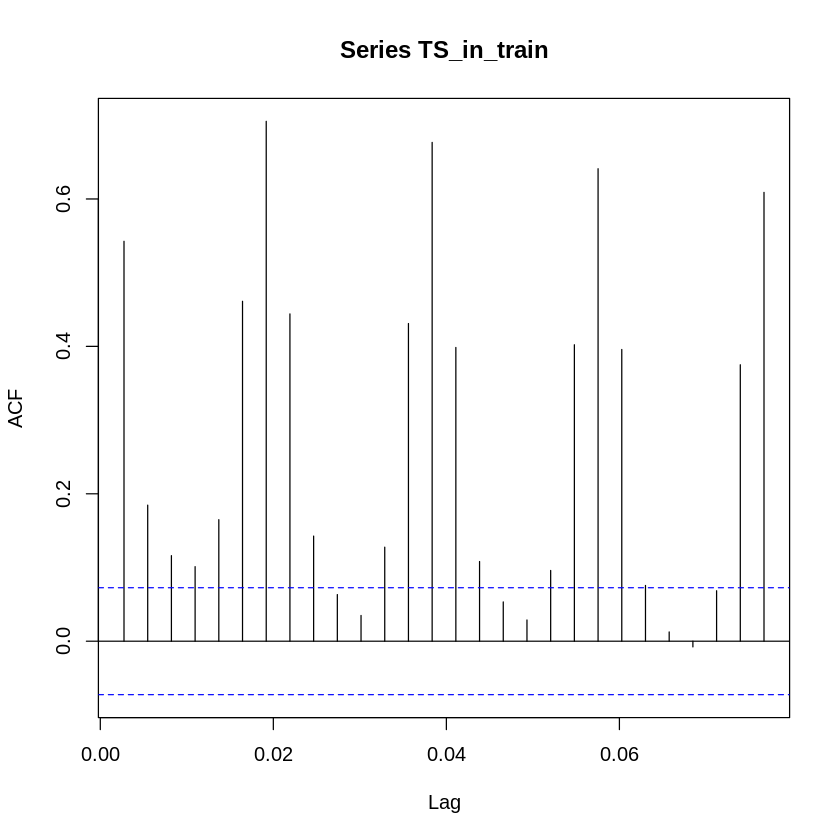

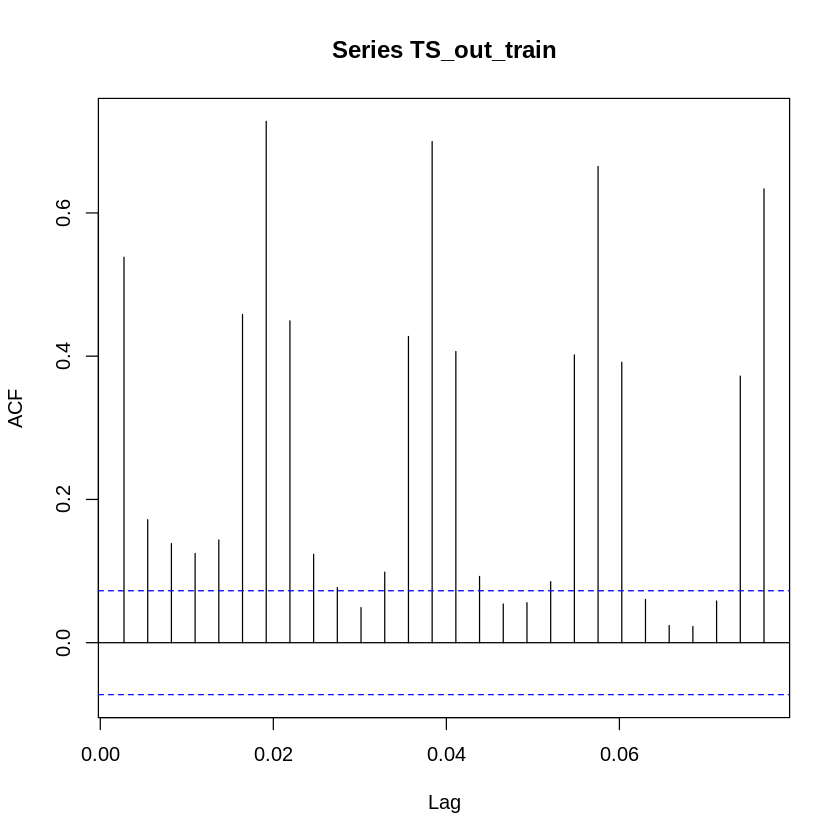

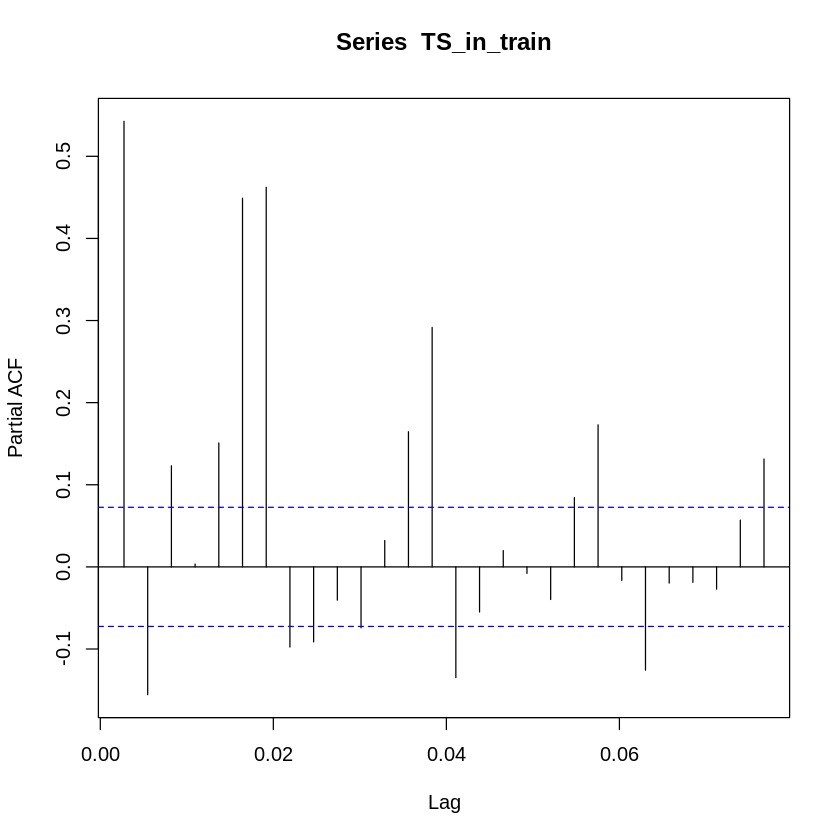

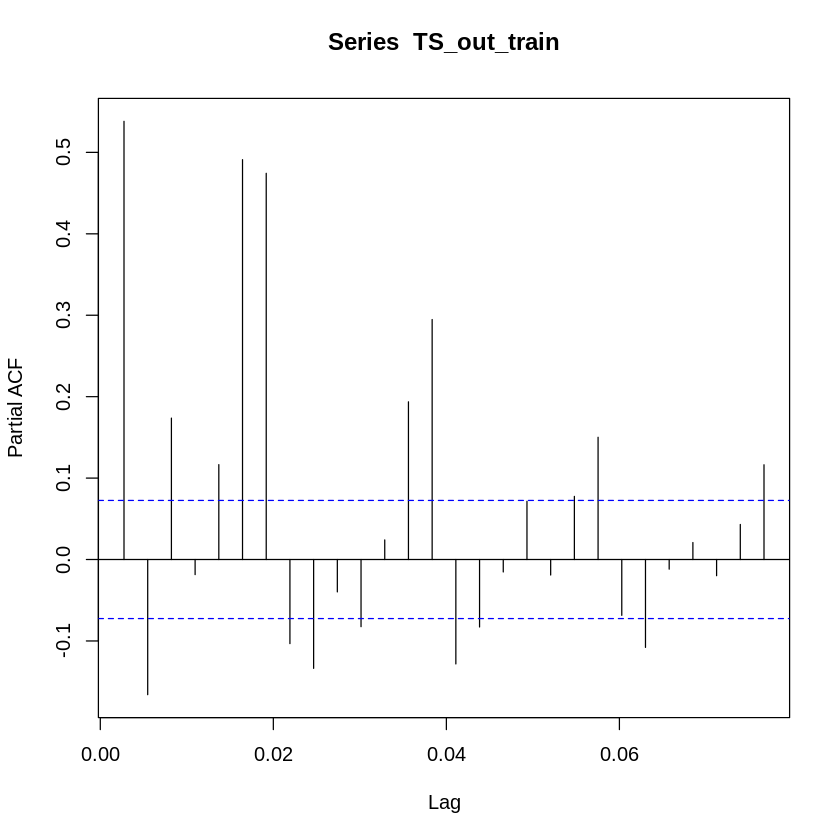

In [ ]:
acf(TS_in_train)
acf(TS_out_train)
pacf(TS_in_train)
pacf(TS_out_train)

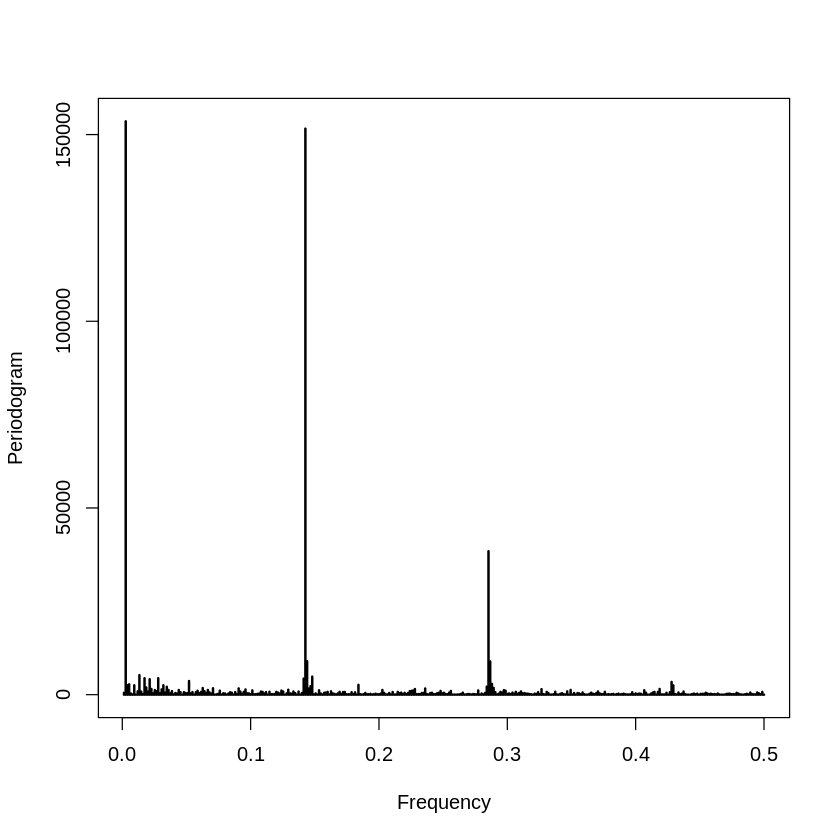

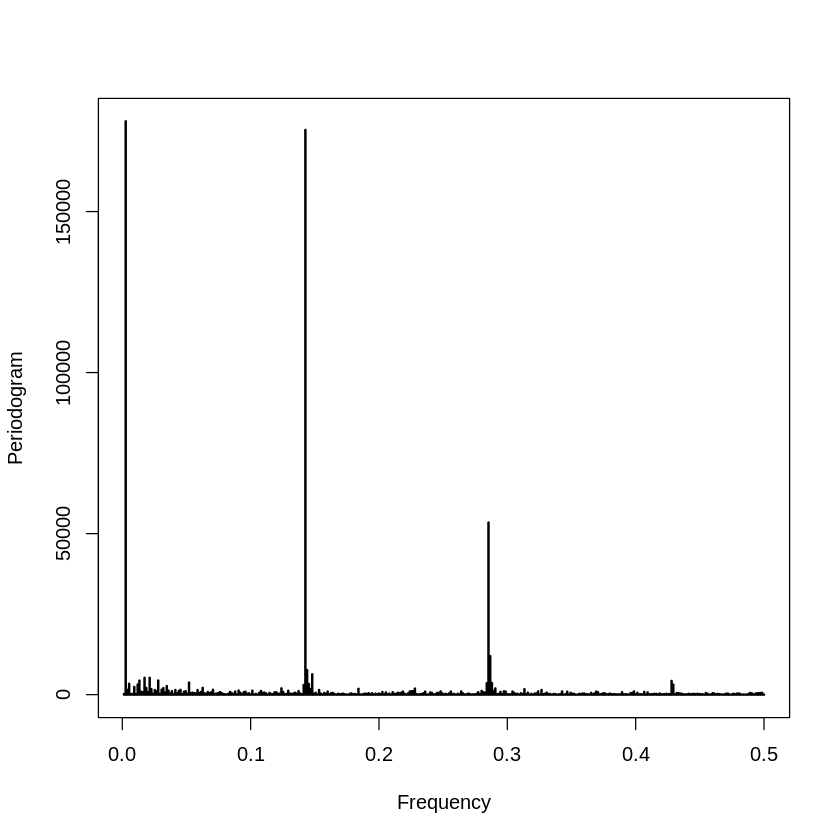

In [ ]:
p_in = periodogram(TS_in_train)
p_out = periodogram(TS_out_train)

In [ ]:
# display the 3 highest "power" frequencies
p_in_df = data.frame(freq=p_in$freq, spec=p_in$spec)
order_p_in = p_in_df[order(-p_in_df$spec),]
top3_p_in = head(order_p_in, 3)
top3_p_in$period <- 1/top3_p_in$freq 
top3_p_in

# display the 3 highest "power" frequencies
p_out_df = data.frame(freq=p_out$freq, spec=p_out$spec)
order_p_out = p_out_df[order(-p_out_df$spec),]
top3_p_out = head(order_p_out, 3)
top3_p_out$period <- 1/top3_p_out$freq 
top3_p_out

freq        spec      period    
2   0.002666667 153546.26 375.000000
107 0.142666667 151581.04   7.009346
214 0.285333333  38416.76   3.504673

freq        spec      period    
2   0.002666667 178009.70 375.000000
107 0.142666667 175342.45   7.009346
214 0.285333333  53463.75   3.504673

### Modeling & Forecasting 1: TBATS

#### Modeling & Forecasting 1a: TBATS (Half-weekly, Weekly, Yearly)

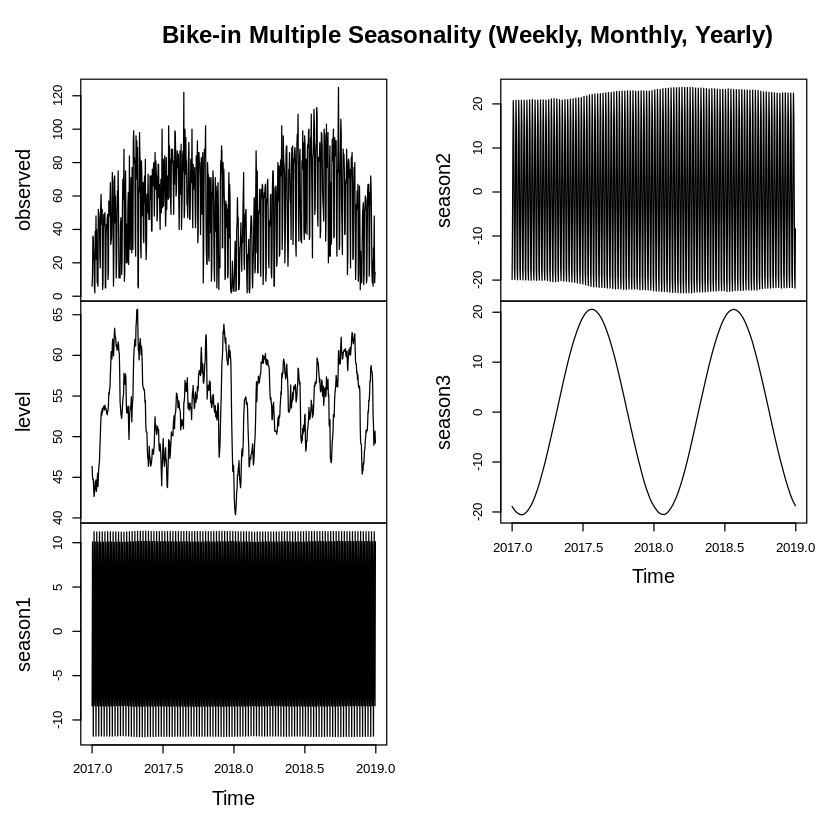

In [51]:
msts_in_train <- msts(TS_in_train, seasonal.periods=c(3.5, 7, 365))
tbats_in_train <- tbats(msts_in_train)
plot(tbats.components(tbats_in_train),main='Bike-in Multiple Seasonality (Weekly, Monthly, Yearly)')

In [52]:
tbats_in_train
summary(tbats_in_train)

TBATS(1, {0,1}, -, {<3.5,1>, <7,1>, <365,1>})

Call: tbats(y = msts_in_train)

Parameters
  Alpha: 0.07486712
  Gamma-1 Values: -0.0003587434 -0.001968431 -0.0006397066
  Gamma-2 Values: -0.0002806217 0.002005013 0.0005257245
  MA coefficients: 0.205752

Seed States:
           [,1]
[1,]  45.790229
[2,]  -8.398303
[3,]   8.441779
[4,] -19.817557
[5,]   6.543005
[6,] -18.876335
[7,]  -8.019243
[8,]   0.000000

Sigma: 14.97896
AIC: 8796.626

                  Length Class  Mode     
lambda               0   -none- NULL     
alpha                1   -none- numeric  
beta                 0   -none- NULL     
damping.parameter    0   -none- NULL     
gamma.one.values     3   -none- numeric  
gamma.two.values     3   -none- numeric  
ar.coefficients      0   -none- NULL     
ma.coefficients      1   -none- numeric  
likelihood           1   -none- numeric  
optim.return.code    1   -none- numeric  
variance             1   -none- numeric  
AIC                  1   -none- numeric  
parameters           2   -none- list     
seed.states          8   -none- numeric  
fitted.values      730   msts   numeric  
errors             730   msts   numeric  
x                 5840   -none- numeric  
seasonal.periods     3   -none- numeric  
k.vector             3   -none- numeric  
y                  730   msts   numeric  
p                    1   -none- numeric  
q                    1   -none- numeric  
call                 2   -none- ca

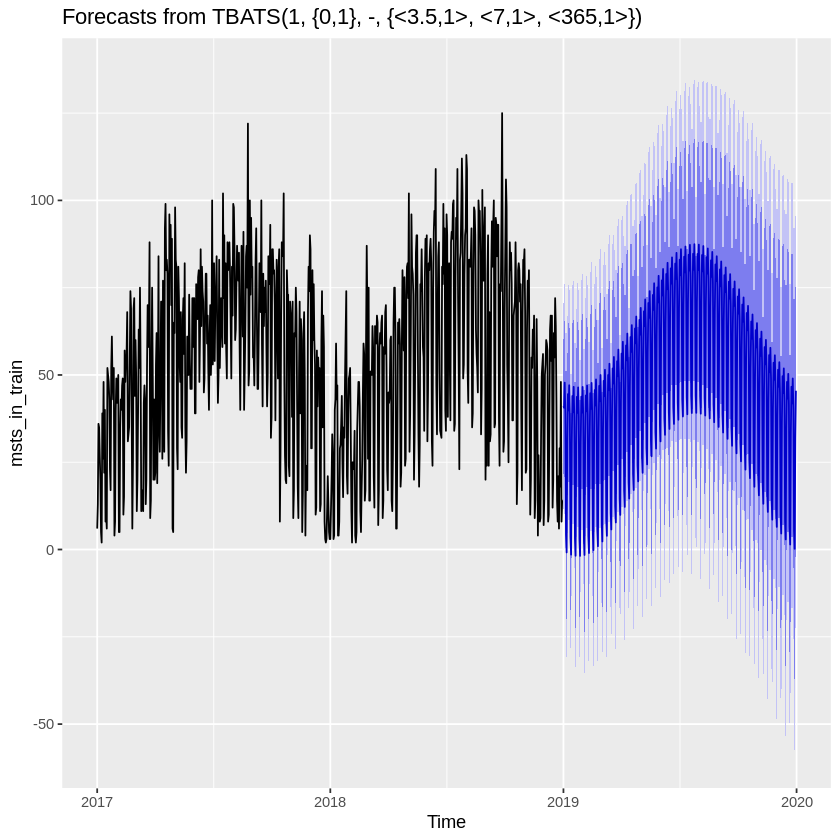

In [56]:
tbats_in_train_fc19 <- forecast(tbats_in_train,h=365)
autoplot(tbats_in_train_fc19)

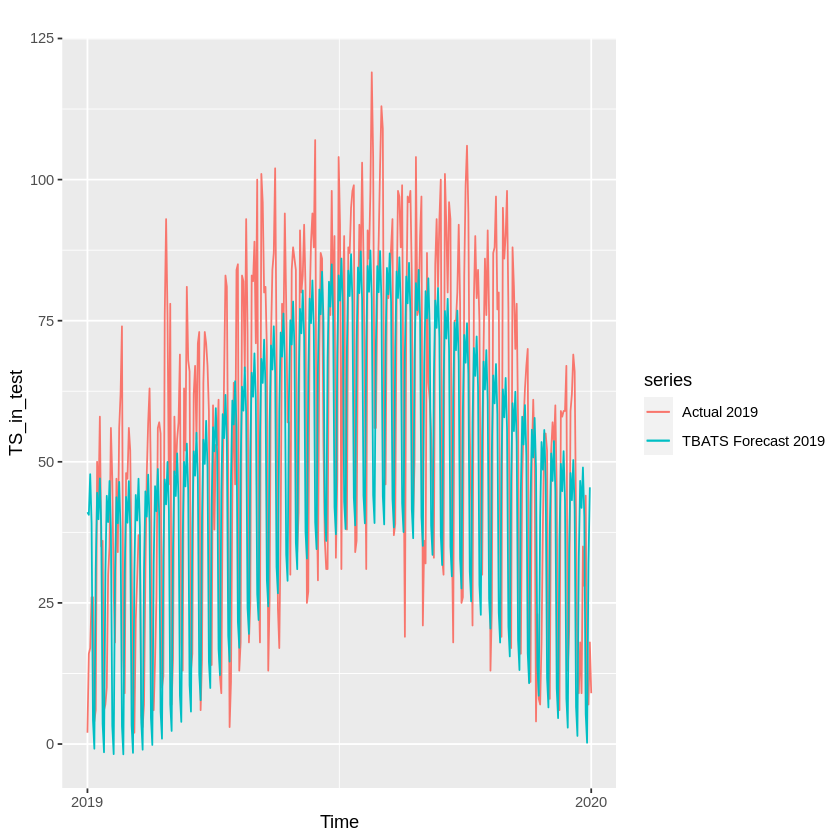

In [57]:
autoplot(TS_in_test, series='Actual 2019') + autolayer(tbats_in_train_fc19$mean, series='TBATS Forecast 2019')


	Ljung-Box test

data:  Residuals from TBATS(1, {0,1}, -, {<3.5,1>, <7,1>, <365,1>})
Q* = 351.56, df = 130, p-value < 2.2e-16

Model df: 16.   Total lags used: 146



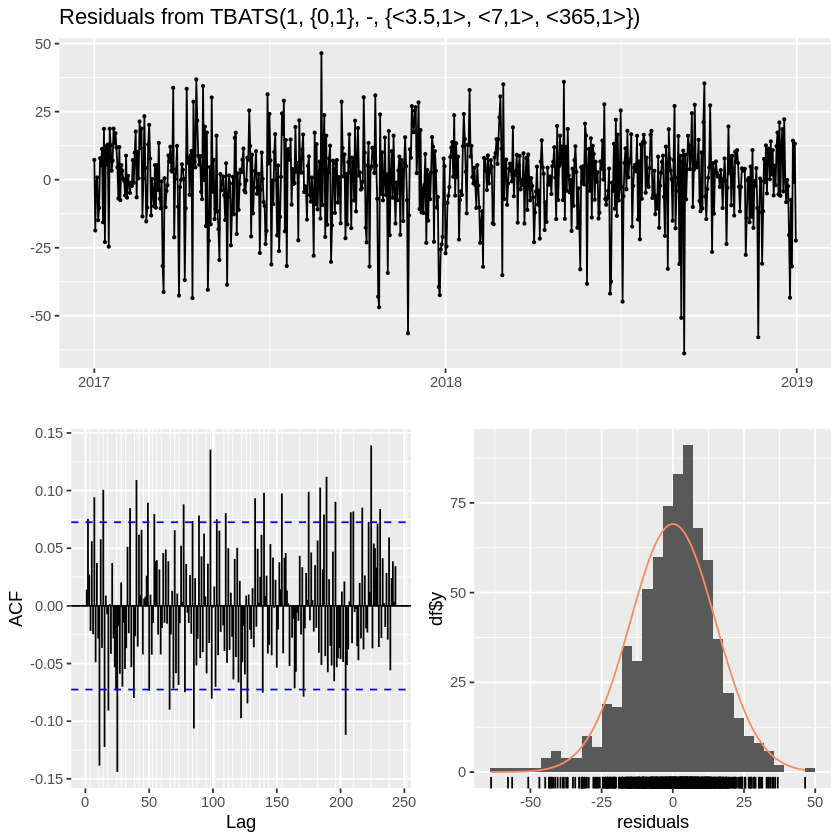

In [59]:
checkresiduals(tbats_in_train_fc19)

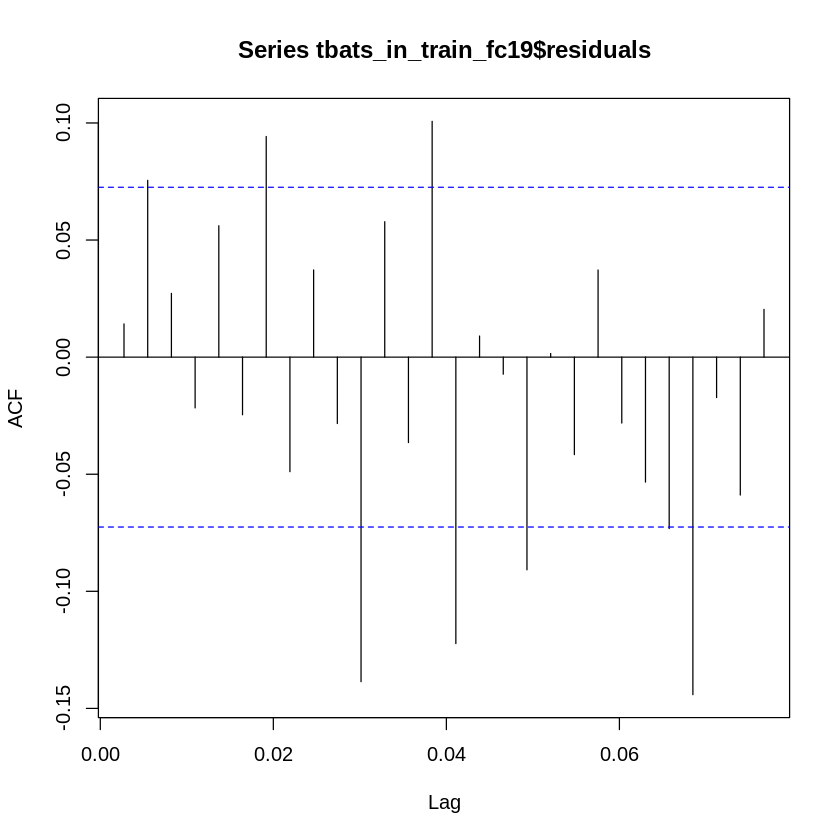

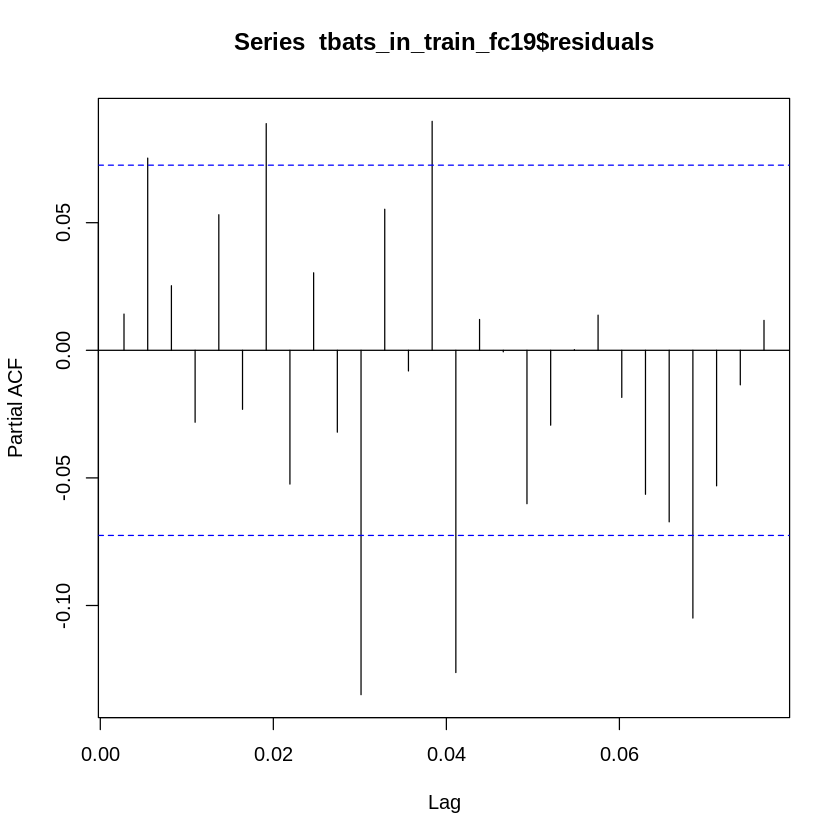

In [61]:
acf(tbats_in_train_fc19$residuals)
pacf(tbats_in_train_fc19$residuals)

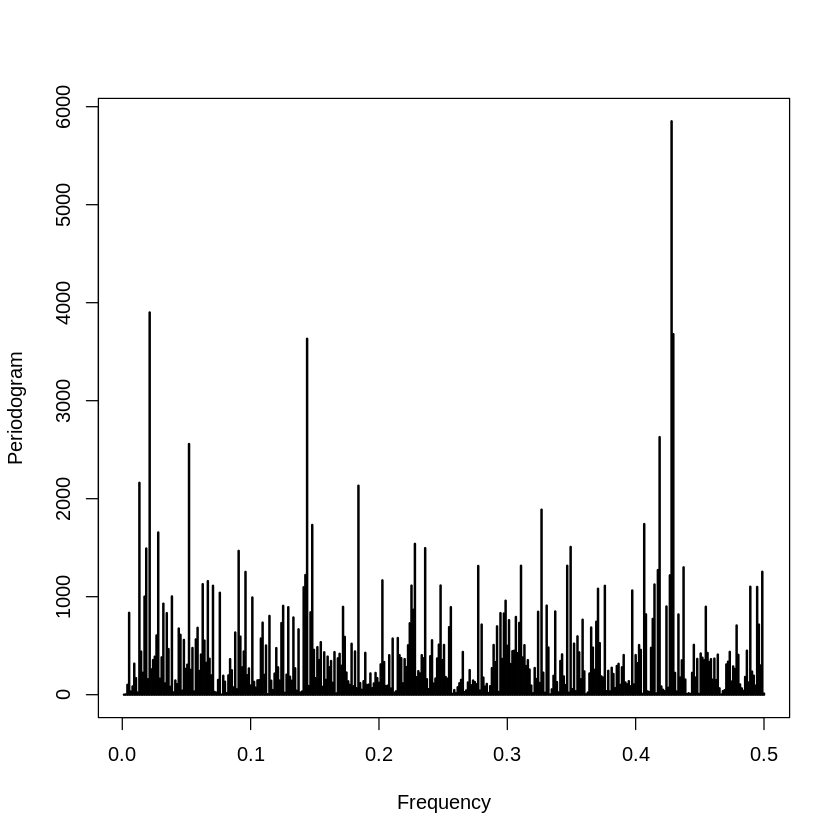

In [62]:
periodogram(tbats_in_train_fc19$residuals)

#### Modeling & Forecasting 1b: TBATS (Weekly, Yearly)

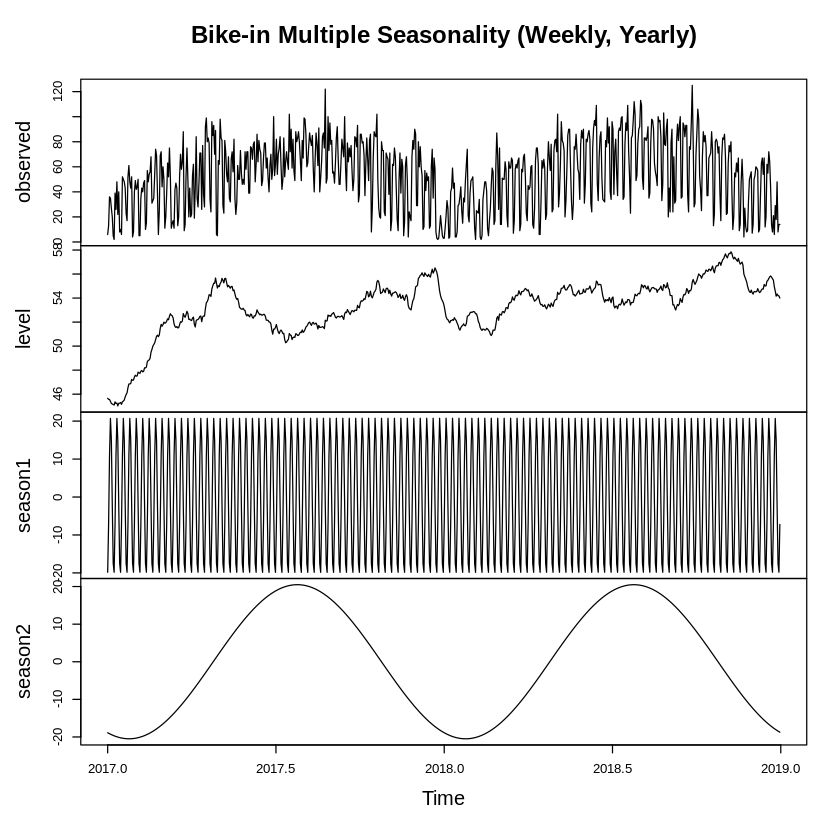

In [55]:
msts_in_train1 <- msts(TS_in_train, seasonal.periods=c(7, 365))
tbats_in_train1 <- tbats(msts_in_train1)
plot(tbats.components(tbats_in_train1),main='Bike-in Multiple Seasonality (Weekly, Yearly)')

In [ ]:
tbats_in_train1
summary(tbats_in_train1)

TBATS(1, {5,0}, -, {<7,1>, <365,1>})

Call: tbats(y = msts_in_train1)

Parameters
  Alpha: 0.01273036
  Gamma-1 Values: 1.677493e-05 -2.184102e-05
  Gamma-2 Values: 7.763014e-05 -1.27236e-05
  AR coefficients: 0.219072 -0.118368 0.242059 0.121784 -0.131043

Seed States:
            [,1]
 [1,]  45.667749
 [2,] -19.824024
 [3,]   6.565193
 [4,] -18.871152
 [5,]  -7.956309
 [6,]   0.000000
 [7,]   0.000000
 [8,]   0.000000
 [9,]   0.000000
[10,]   0.000000

Sigma: 16.48659
AIC: 8944.642

                  Length Class  Mode     
lambda               0   -none- NULL     
alpha                1   -none- numeric  
beta                 0   -none- NULL     
damping.parameter    0   -none- NULL     
gamma.one.values     2   -none- numeric  
gamma.two.values     2   -none- numeric  
ar.coefficients      5   -none- numeric  
ma.coefficients      0   -none- NULL     
likelihood           1   -none- numeric  
optim.return.code    1   -none- numeric  
variance             1   -none- numeric  
AIC                  1   -none- numeric  
parameters           2   -none- list     
seed.states         10   -none- numeric  
fitted.values      730   msts   numeric  
errors             730   msts   numeric  
x                 7300   -none- numeric  
seasonal.periods     2   -none- numeric  
k.vector             2   -none- numeric  
y                  730   msts   numeric  
p                    1   -none- numeric  
q                    1   -none- numeric  
call                 2   -none- ca

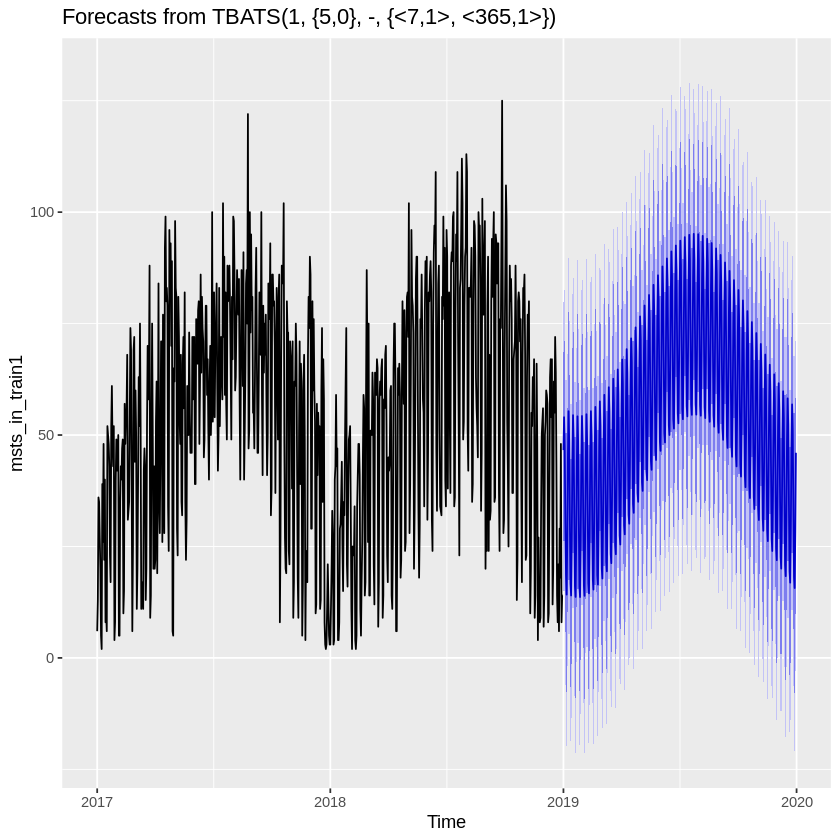

In [63]:
tbats_in_train1_fc19 <- forecast(tbats_in_train1,h=365)
autoplot(tbats_in_train1_fc19)

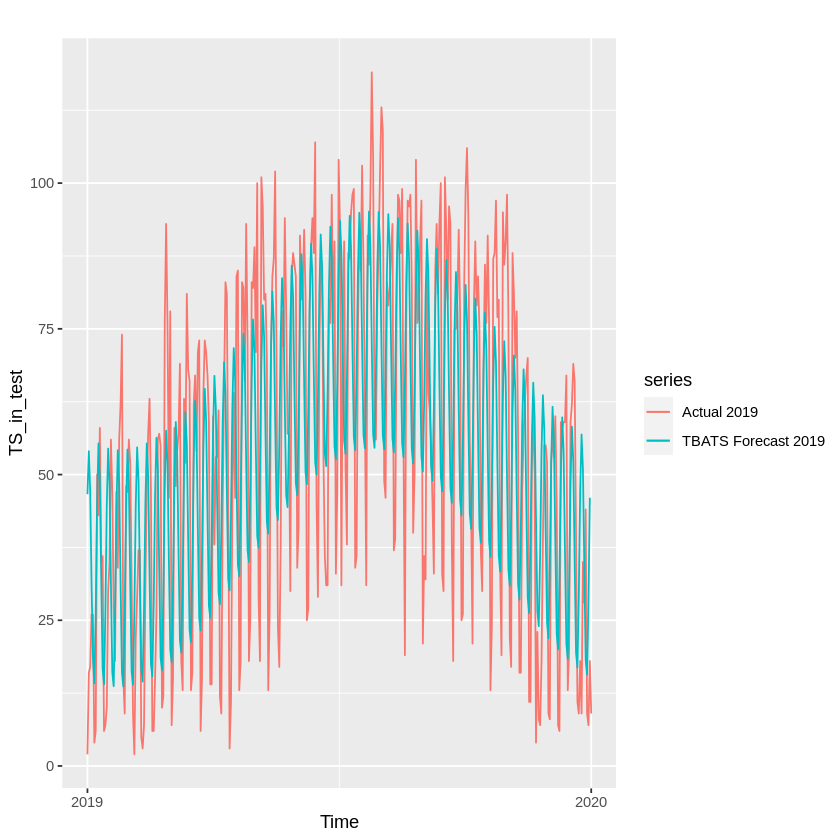

In [64]:
autoplot(TS_in_test, series='Actual 2019') + autolayer(tbats_in_train1_fc19$mean, series='TBATS Forecast 2019')


	Ljung-Box test

data:  Residuals from TBATS(1, {5,0}, -, {<7,1>, <365,1>})
Q* = 832.37, df = 126, p-value < 2.2e-16

Model df: 20.   Total lags used: 146



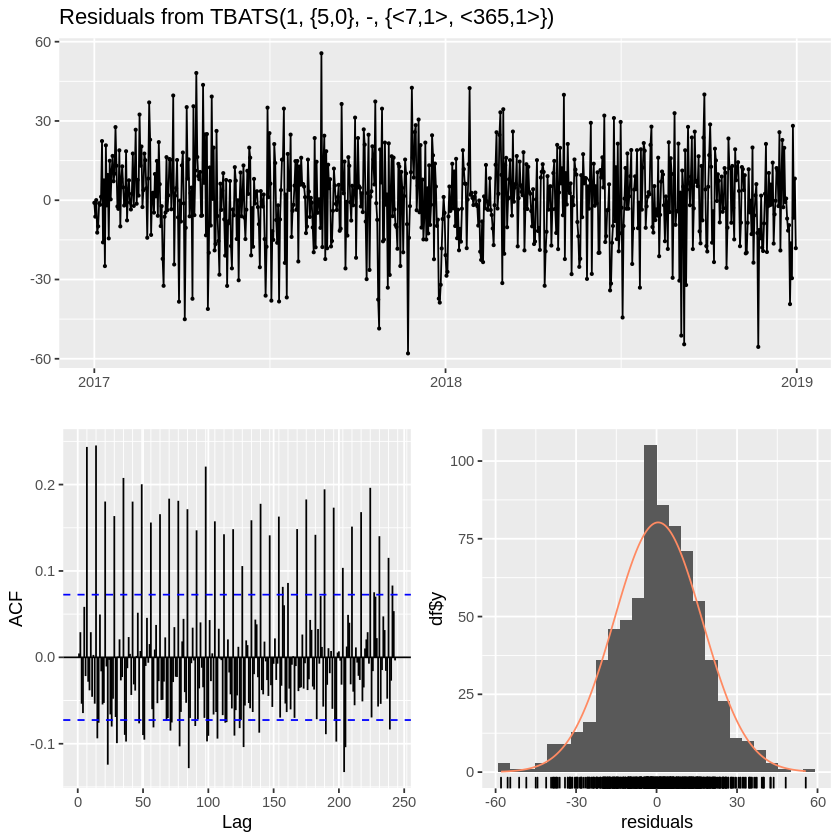

In [66]:
checkresiduals(tbats_in_train1_fc19)

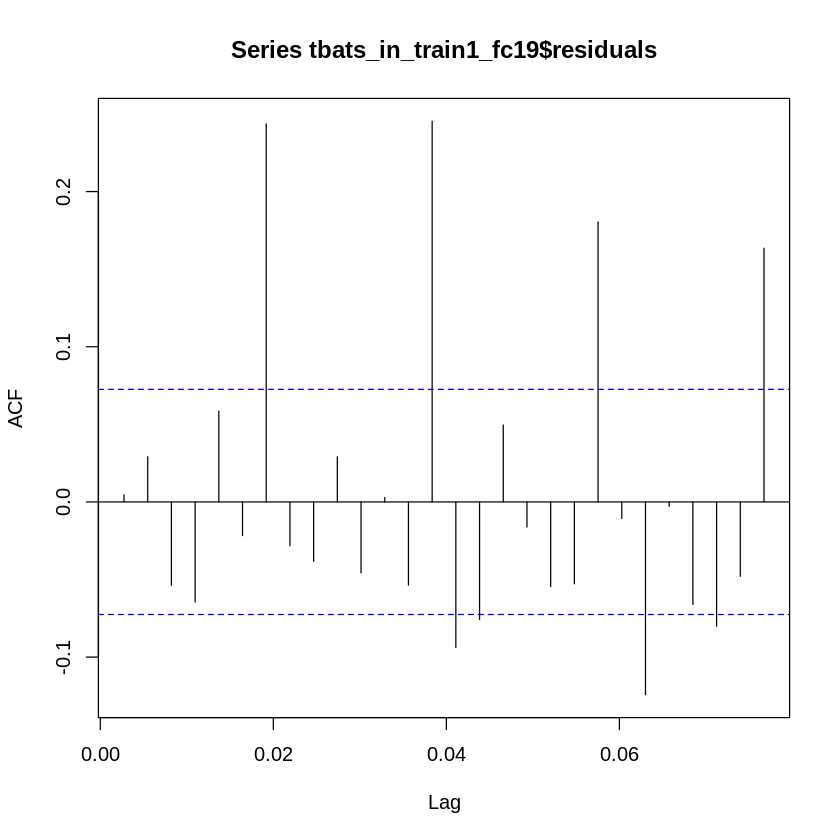

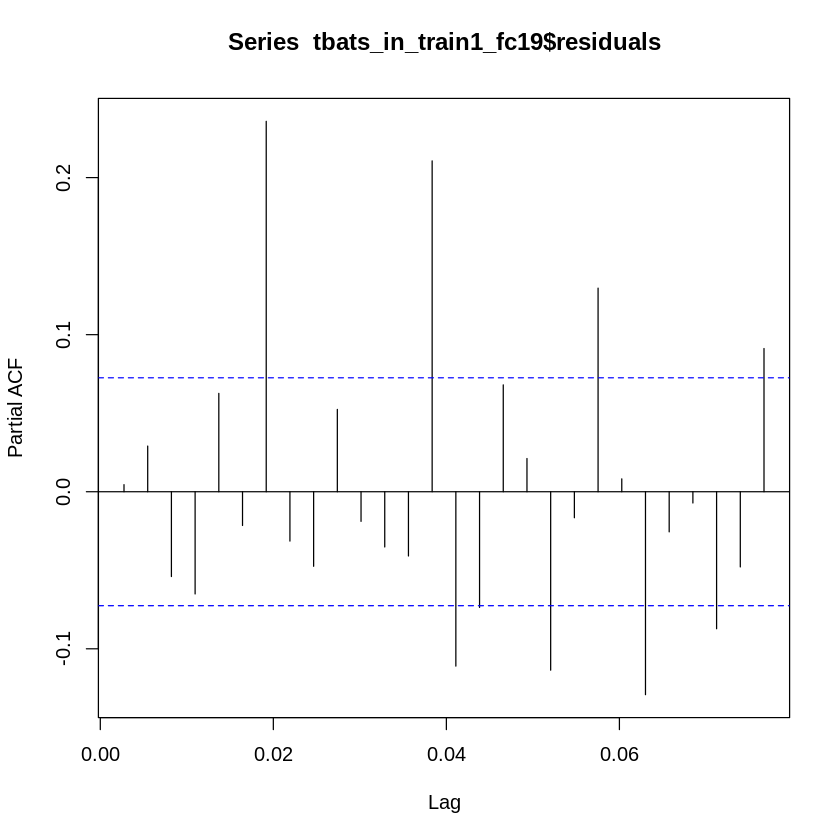

In [68]:
acf(tbats_in_train1_fc19$residuals)
pacf(tbats_in_train1_fc19$residuals)

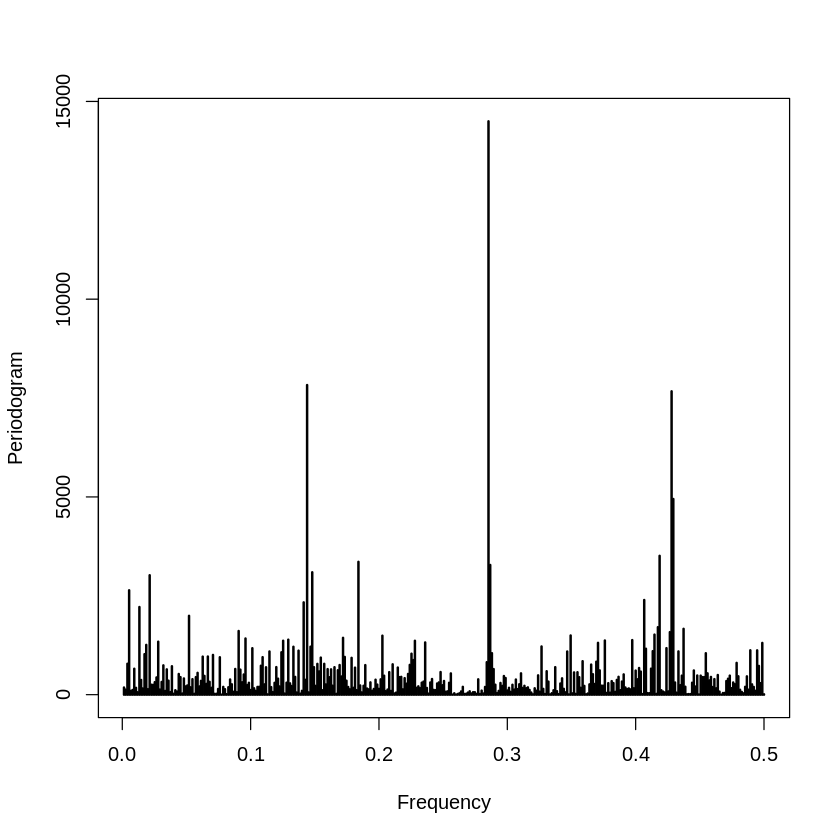

In [69]:
periodogram(tbats_in_train1_fc19$residuals)

## Modeling & Forecasting 2: DSHW

In [86]:
dshw_in_train_wy <- dshw(TS_in_train, period1 = 7, period2 = 7*52)
dshw_out_train_wy <- dshw(TS_out_train, period1 = 7, period2 = 7*52)

In [87]:
#summary too long
#dshw_in_train_wy
#summary(dshw_in_train_wy)
#dshw_out_train_wy
#summary(dshw_out_train_wy)

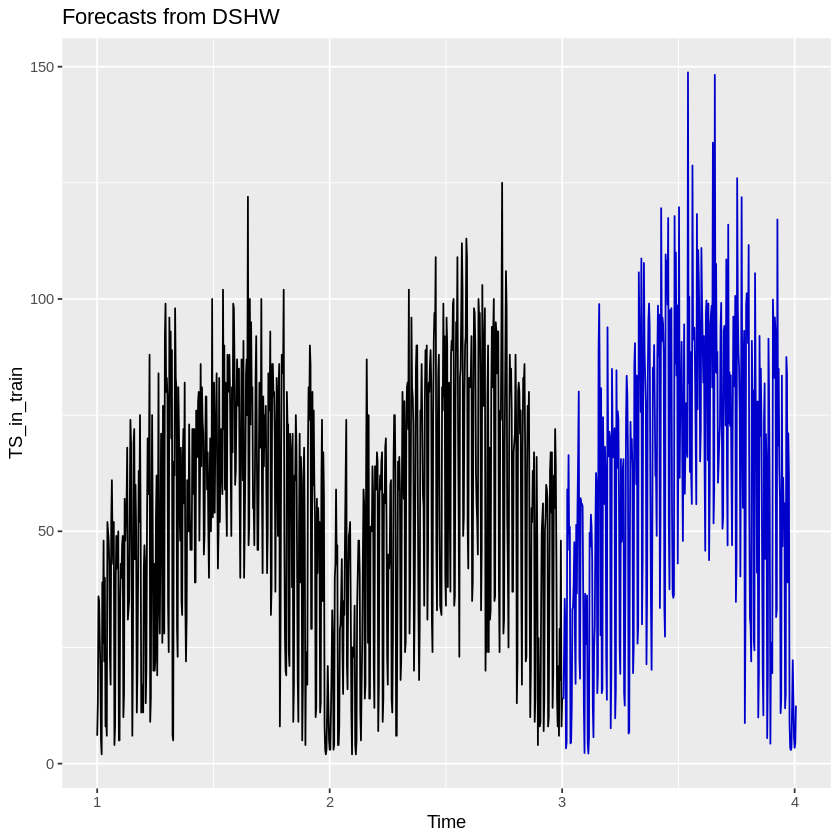

In [88]:
dshw_in_train_wy_fc19 <- forecast(dshw_in_train_wy, h=365)
autoplot(dshw_in_train_wy_fc19)

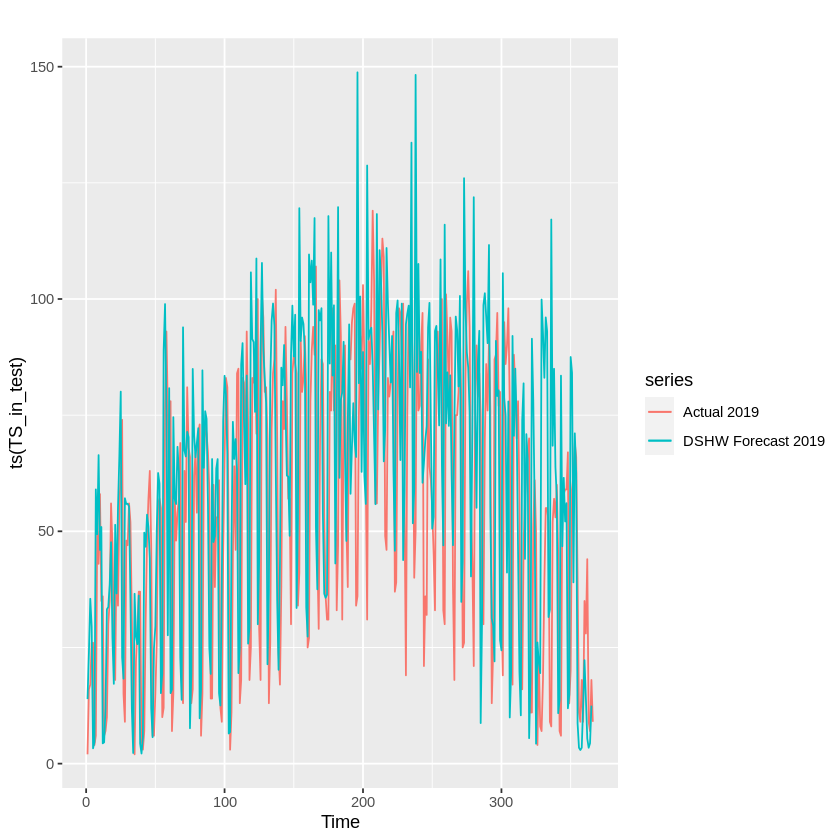

In [89]:
autoplot(ts(TS_in_test), series='Actual 2019') + autolayer(ts(dshw_in_train_wy_fc19$mean), series='DSHW Forecast 2019')

Warning message in modeldf.default(object):
“Could not find appropriate degrees of freedom for this model.”


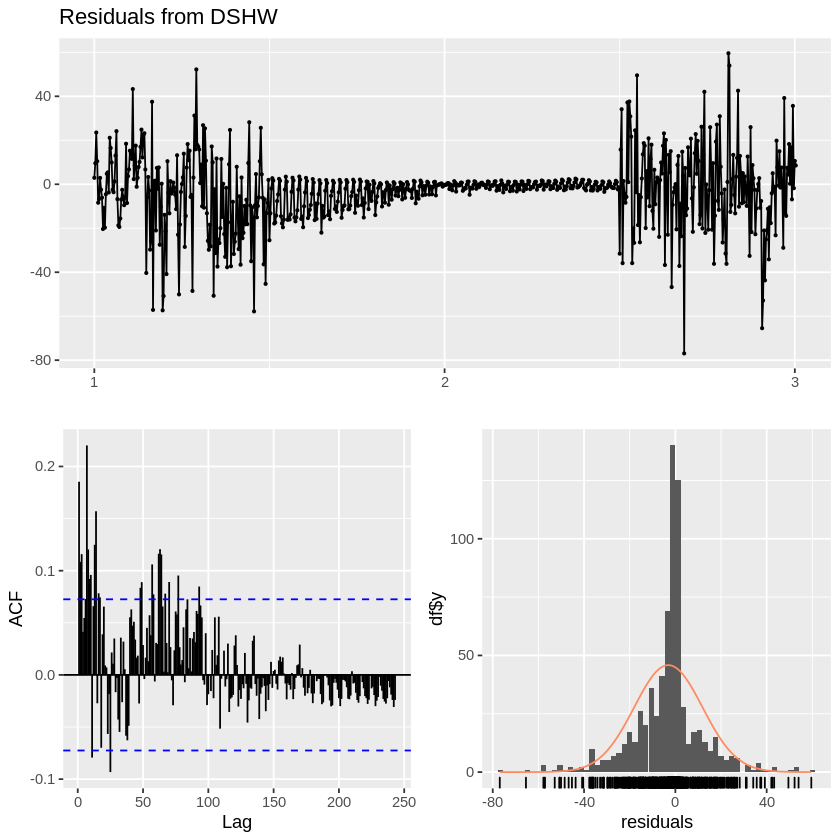

In [90]:
checkresiduals(dshw_in_train_wy_fc19)

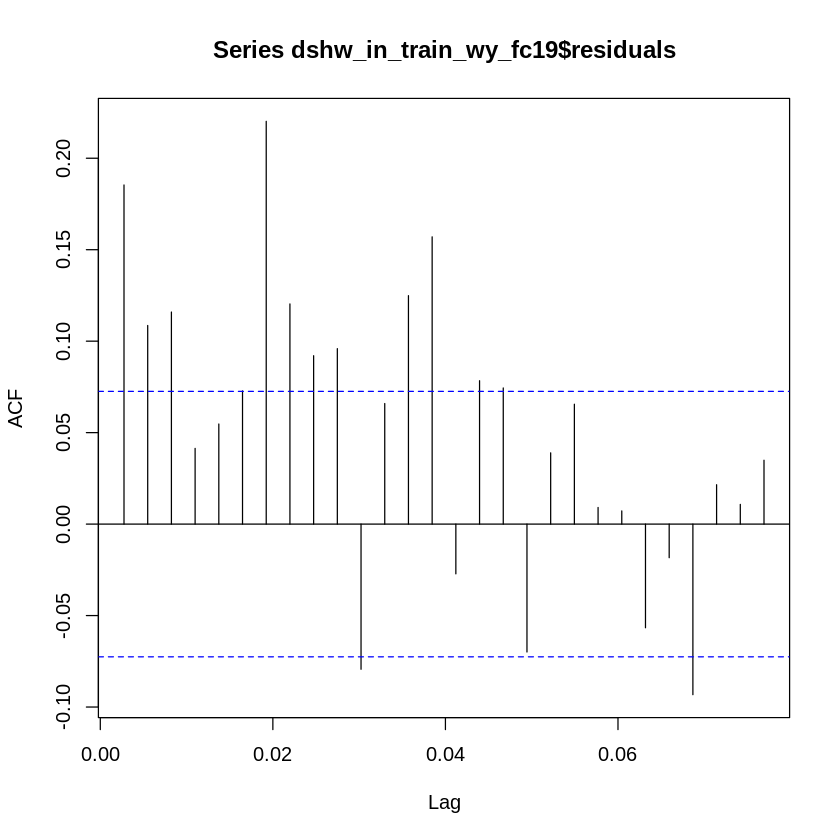

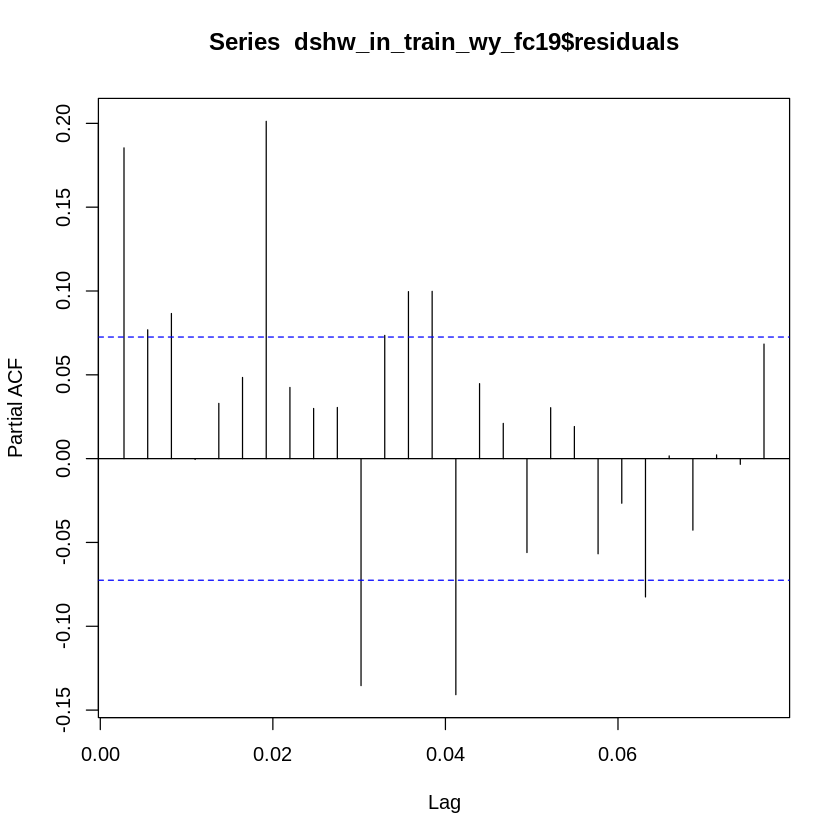

In [91]:
acf(dshw_in_train_wy_fc19$residuals)
pacf(dshw_in_train_wy_fc19$residuals)

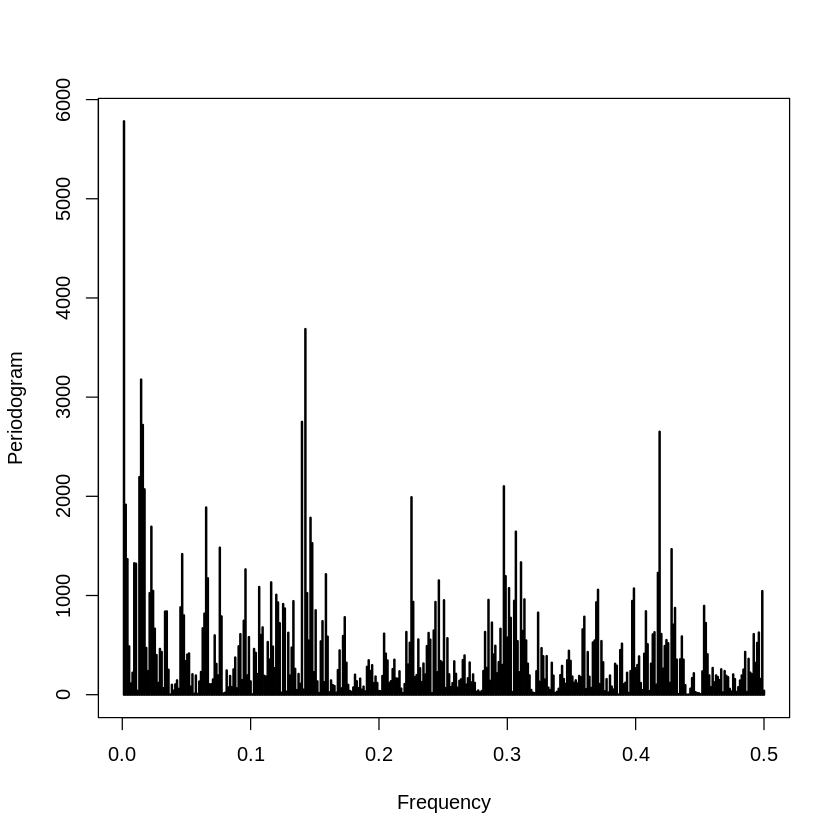

In [92]:
periodogram(dshw_in_train_wy_fc19$residuals)

In [ ]:
# Cannot perform DSHW on half-weekly: Seasonal periods are not nested
#dshw_in_train_hwy <- dshw(TS_in_train, period1 = 3.5, period2 = 3.5*2*52)
#dshw_out_train_hwy <- dshw(TS_out_train, period1 = 3.5, period2 = 3.5*2*52)
#dshw_in_train_hwy <- dshw(TS_in_train, period1 = 3.5, period2 = 3.5*104)
#dshw_out_train_hwy <- dshw(TS_out_train, period1 = 3.5, period2 = 3.5*104)
#dshw_in_train_hwy <- dshw(TS_in_train, period1 = 3.5, period2 = 3.5*2)
#dshw_out_train_hwy <- dshw(TS_out_train, period1 = 3.5, period2 = 3.5*2)

## Modeling & Forecasting 3: Auto Arima

In [ ]:
fit0 <- auto.arima(TS_in_train)
(bestfit <- list(aicc=fit0$aicc, i=0, j=0, k=0, fit=fit0))

$aicc
[1] 6479.501

$i
[1] 0

$j
[1] 0

$k
[1] 0

$fit
Series: TS_in_train 
ARIMA(3,1,3) 

Coefficients:
         ar1     ar2      ar3      ma1      ma2     ma3
      0.2173  0.1437  -0.3865  -0.7222  -0.5730  0.4638
s.e.  0.1228  0.1120   0.0791   0.1173   0.1545  0.0683

sigma^2 = 418.4:  log likelihood = -3232.67
AIC=6479.35   AICc=6479.5   BIC=6511.49


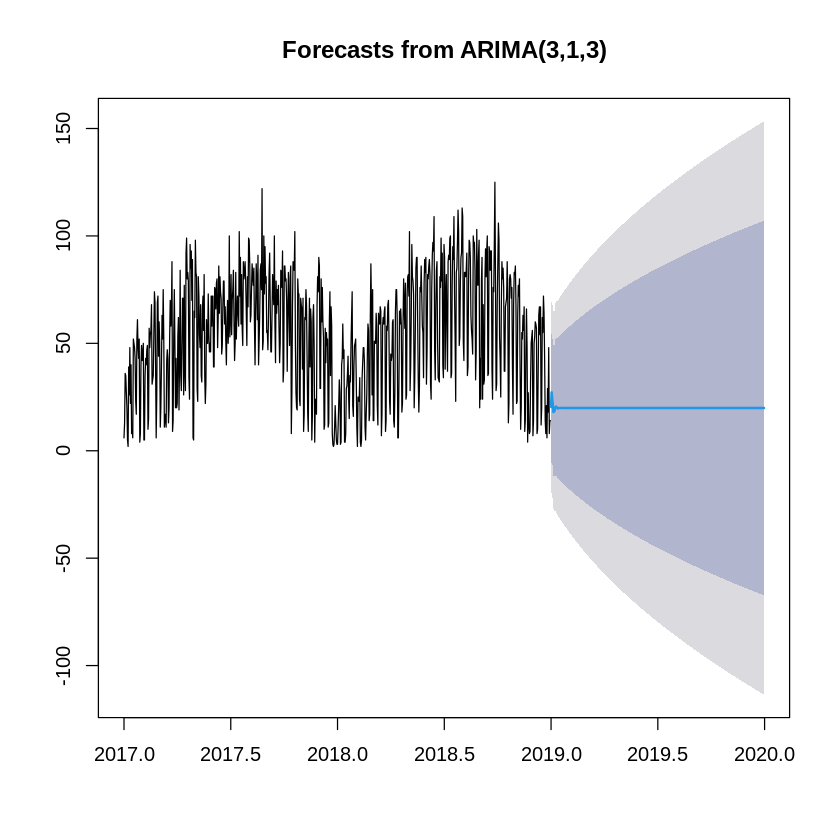

In [ ]:
fc0 <- forecast(fit0, h=365)
plot(fc0)

In [ ]:
# Choose the best model by AICc
fit0 <- auto.arima(TS_in_train)
bestfit <- list(aicc=fit0$aicc, i=0, j=0, k=0, fit=fit0)

for(i in 1:15) {
  for (j in 1:3){
    z1 <- fourier(ts(TS_in_train, frequency=375), K=i)
    z2 <- fourier(ts(TS_in_train, frequency=7), K=j)
    fit <- auto.arima(TS_in_train, xreg=cbind(z1, z2), seasonal=F)
    if(fit$aicc < bestfit$aicc) {
      bestfit <- list(aicc=fit$aicc, i=i, j=j, fit=fit)
    }
  }
}
bestfit

$aicc
[1] 5952.66

$i
[1] 8

$j
[1] 3

$fit
Series: TS_in_train 
Regression with ARIMA(1,0,2) errors 

Coefficients:
          ar1     ma1     ma2  intercept   S1-375    C1-375  S2-375   C2-375
      -0.9751  1.2409  0.2680    53.2064  -5.0206  -21.0224  1.9551  -3.9579
s.e.   0.0301  0.0465  0.0369     0.6498   0.9018    0.9357  0.9049   0.9323
      S3-375   C3-375  S4-375   C4-375   S5-375   C5-375  S6-375   C6-375
      0.5903  -1.2087  0.8879  -1.2995  -1.8725  -3.3415  0.5917  -1.3290
s.e.  0.9092   0.9275  0.9138   0.9221   0.9176   0.9171  0.9200   0.9134
      S7-375  C7-375  S8-375   C8-375      S1-7      C1-7      S2-7     C2-7
      2.8782  0.8448  4.4299  -1.3497  -11.3925  -17.4491  -10.0538  -6.3706
s.e.  0.9207  0.9112  0.9198   0.9106    0.8518    0.8528    0.6972   0.6977
         S3-7     C3-7
      -3.3645  -2.7893
s.e.   0.5434   0.5431

sigma^2 = 195.5:  log likelihood = -2948.25
AIC=5950.51   AICc=5952.66   BIC=6074.52


In [ ]:
# Choose the best model by AICc
fit0 <- auto.arima(TS_in_train)
bestfit <- list(aicc=fit0$aicc, i=0, j=0, k=0, fit=fit0)

for(i in 1:15) {
  for (j in 1:3){
    z1 <- fourier(ts(TS_in_train, frequency=365), K=i)
    z2 <- fourier(ts(TS_in_train, frequency=7), K=j)
    fit <- auto.arima(TS_in_train, xreg=cbind(z1, z2), seasonal=F)
    if(fit$aicc < bestfit$aicc) {
      bestfit <- list(aicc=fit$aicc, i=i, j=j, fit=fit)
    }
  }
}
bestfit

$aicc
[1] 5953.914

$i
[1] 11

$j
[1] 3

$fit
Series: TS_in_train 
Regression with ARIMA(0,0,1) errors 

Coefficients:
         ma1  intercept   S1-365    C1-365  S2-365   C2-365   S3-365   C3-365
      0.2501    54.1416  -8.7238  -18.7322  0.3861  -3.9276  -0.2284  -1.1579
s.e.  0.0362     0.6320   0.8940    0.8935  0.8939   0.8934   0.8938   0.8933
      S4-365   C4-365   S5-365   C5-365   S6-365   C6-365  S7-365   C7-365
      0.5639  -1.1148  -2.7422  -0.2478  -1.6580  -1.5029  1.3443  -0.9524
s.e.  0.8937   0.8932   0.8935   0.8930   0.8932   0.8928  0.8930   0.8925
       S8-365   C8-365   S9-365   C9-365  S10-365  C10-365  S11-365  C11-365
      -0.7302  -4.0124  -0.7347  -1.6672   1.2570  -3.1677  -0.3584  -1.3754
s.e.   0.8926   0.8922   0.8923   0.8918   0.8919   0.8914   0.8914   0.8910
          S1-7      C1-7      S2-7     C2-7     S3-7     C3-7
      -11.3637  -17.4349  -10.0458  -6.3882  -3.3667  -2.7908
s.e.    0.8378    0.8388    0.6972   0.6977   0.5597   0.5595

sigm

In [ ]:
# Choose the best model by AICc
fit0 <- auto.arima(TS_in_train)
bestfit <- list(aicc=fit0$aicc, i=0, j=0, k=0, fit=fit0)

for(i in 1:3) {
  for (j in 1:3){
    z1 <- fourier(ts(TS_in_train, frequency=375), K=i)
    z2 <- fourier(ts(TS_in_train, frequency=7), K=j)
    fit <- auto.arima(TS_in_train, xreg=cbind(z1, z2), seasonal=F)
    if(fit$aicc < bestfit$aicc) {
      bestfit <- list(aicc=fit$aicc, i=i, j=j, fit=fit)
    }
  }
}
bestfit

$aicc
[1] 5971.745

$i
[1] 2

$j
[1] 3

$fit
Series: TS_in_train 
Regression with ARIMA(3,0,3) errors 

Coefficients:
          ar1     ar2     ar3     ma1     ma2      ma3  intercept   S1-375
      -1.0189  0.3738  0.4311  1.3392  0.0394  -0.3384    53.4800  -5.1027
s.e.   0.3690  0.3669  0.1078  0.3791  0.5154   0.1636     0.8767   1.2236
        C1-375  S2-375   C2-375      S1-7      C1-7      S2-7     C2-7     S3-7
      -20.4831  1.7947  -3.4422  -11.4283  -17.4609  -10.0603  -6.3635  -3.3816
s.e.    1.2546  1.2248   1.2499    0.8097    0.8105    0.6967   0.6972   0.5665
         C3-7
      -2.7930
s.e.   0.5664

sigma^2 = 203.4:  log likelihood = -2967.39
AIC=5970.78   AICc=5971.75   BIC=6053.46


In [ ]:
# Choose the best model by AICc
fit0 <- auto.arima(TS_in_train)
bestfit <- list(aicc=fit0$aicc, i=0, j=0, k=0, fit=fit0)

for(i in 1:3) {
  for (j in 1:3){
    z1 <- fourier(ts(TS_in_train, frequency=365), K=i)
    z2 <- fourier(ts(TS_in_train, frequency=7), K=j)
    fit <- auto.arima(TS_in_train, xreg=cbind(z1, z2), seasonal=F)
    if(fit$aicc < bestfit$aicc) {
      bestfit <- list(aicc=fit$aicc, i=i, j=j, fit=fit)
    }
  }
}
bestfit

$aicc
[1] 5970.431

$i
[1] 2

$j
[1] 3

$fit
Series: TS_in_train 
Regression with ARIMA(3,0,3) errors 

Coefficients:
         ar1     ar2     ar3     ma1     ma2      ma3  intercept   S1-365
      -1.065  0.3193  0.4223  1.3852  0.1078  -0.3153    54.1133  -8.7248
s.e.   0.354  0.3671  0.1073  0.3636  0.5059   0.1664     0.8566   1.2123
        C1-365  S2-365   C2-365      S1-7      C1-7      S2-7     C2-7     S3-7
      -18.7887  0.3842  -3.9840  -11.4317  -17.4589  -10.0625  -6.3623  -3.3829
s.e.    1.2095  1.2108   1.2079    0.8150    0.8159    0.6937   0.6942   0.5688
         C3-7
      -2.7917
s.e.   0.5686

sigma^2 = 203:  log likelihood = -2966.73
AIC=5969.47   AICc=5970.43   BIC=6052.14


In [14]:
aarima_in_train1 <- auto.arima(TS_in_train, seasonal=FALSE, xreg = cbind(
  fourier(ts(TS_in_train, frequency=375), K=8),
  fourier(ts(TS_in_train, frequency=7), K=3)))
aarima_out_train1 <- auto.arima(TS_out_train, seasonal=FALSE, xreg = cbind(
  fourier(ts(TS_out_train, frequency=375), K=8),
  fourier(ts(TS_out_train, frequency=7), K=3)))

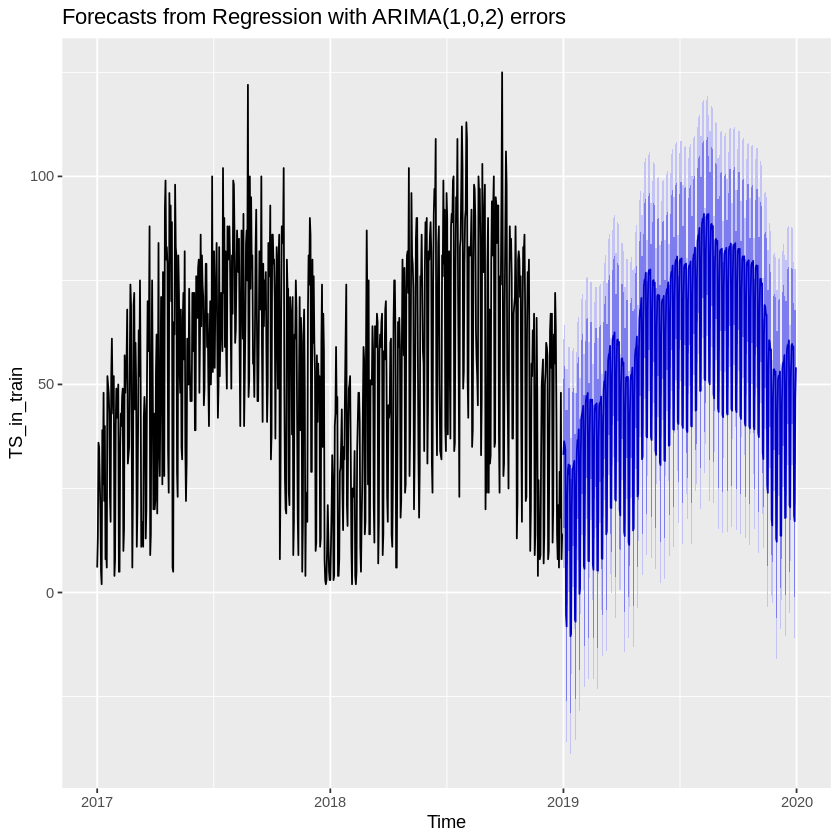

In [15]:
aarima_in_train1_fc19 <- forecast(aarima_in_train1, h=365, xreg = cbind(
  fourier(ts(TS_in_train, frequency=375), K=8, h=365),
  fourier(ts(TS_in_train, frequency=7), K=3, h=365)))
autoplot(aarima_in_train1_fc19)

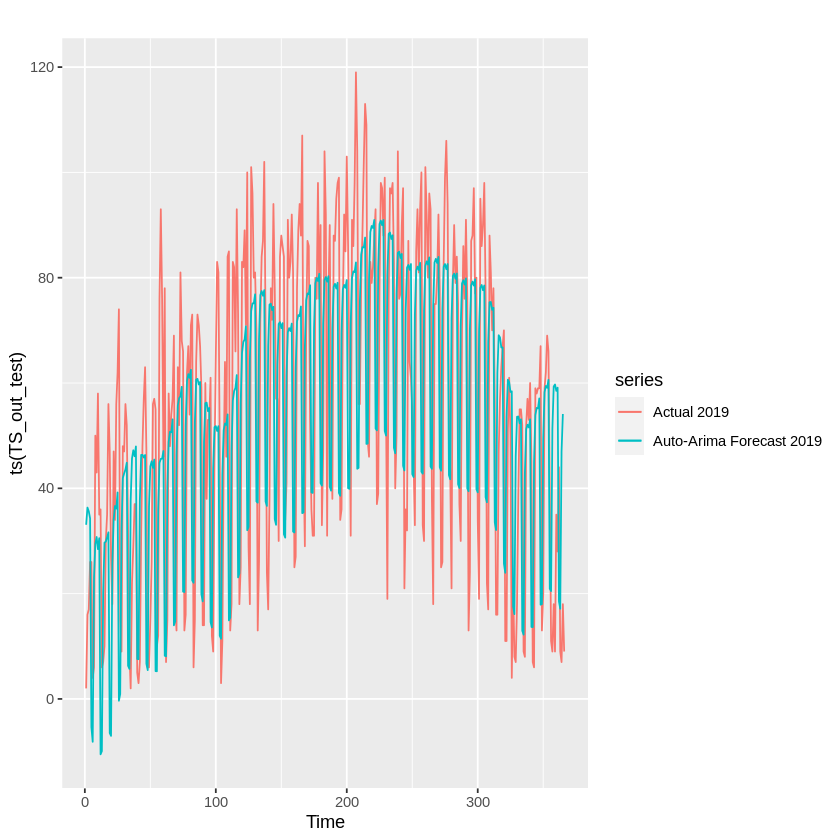

In [70]:
autoplot(ts(TS_out_test), series='Actual 2019') + autolayer(ts(aarima_in_train1_fc19$mean), series='Auto-Arima Forecast 2019')


	Ljung-Box test

data:  Residuals from Regression with ARIMA(1,0,2) errors
Q* = 167.96, df = 120, p-value = 0.002551

Model df: 26.   Total lags used: 146



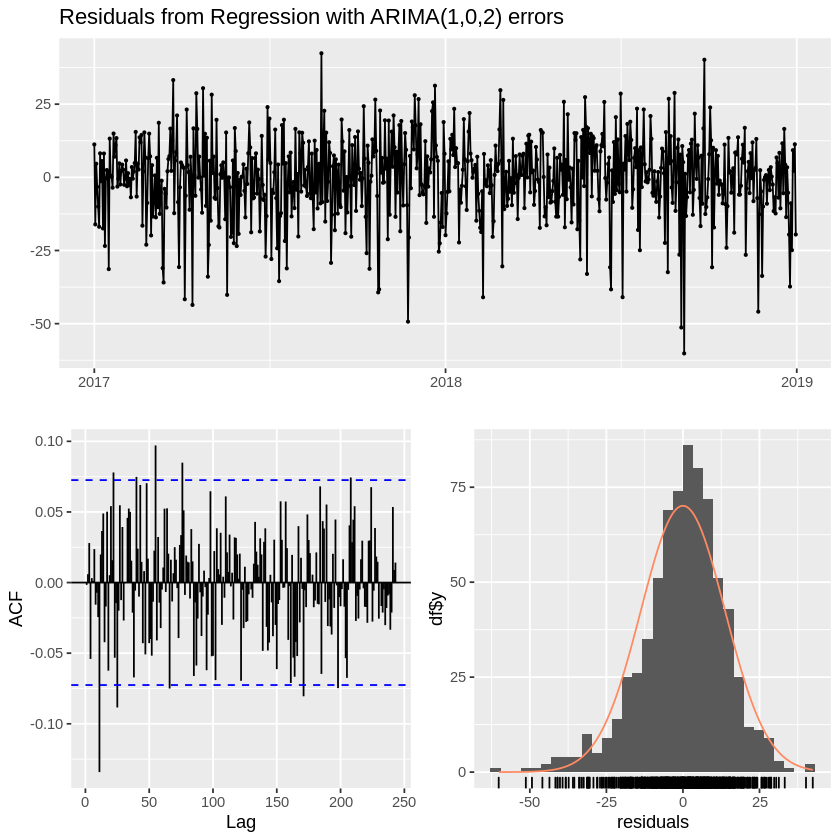

In [16]:
checkresiduals(aarima_in_train1_fc19)

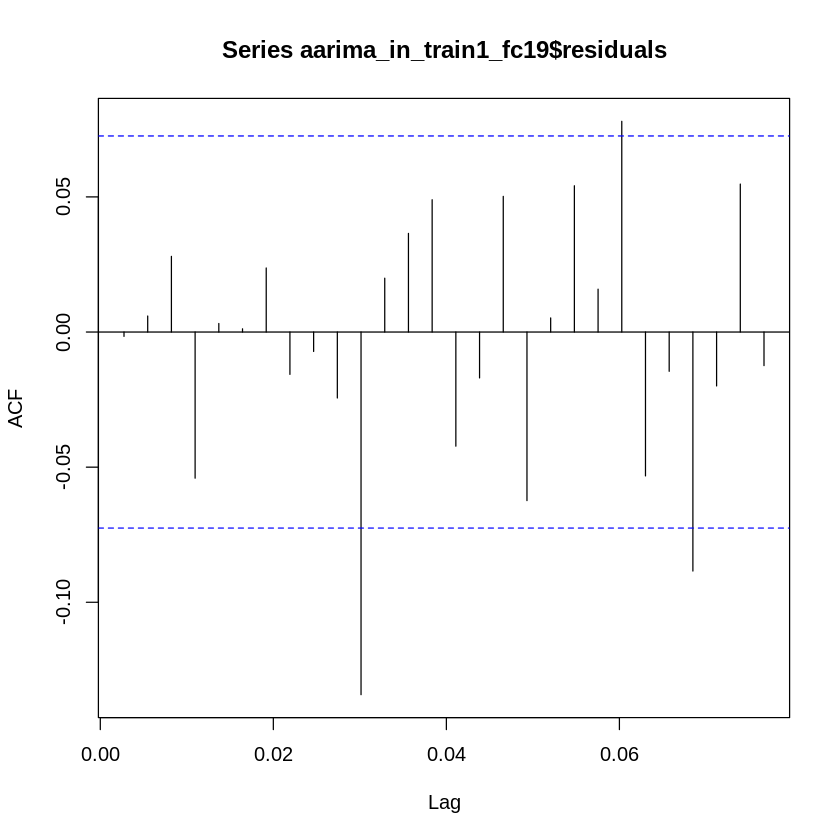

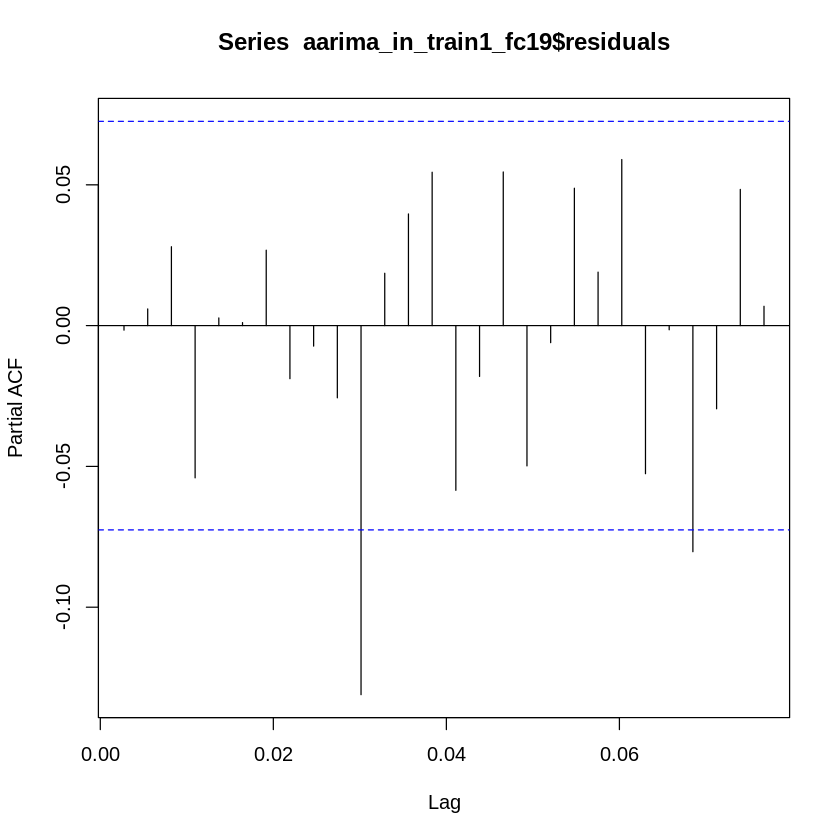

In [18]:
acf(aarima_in_train1_fc19$residuals)
pacf(aarima_in_train1_fc19$residuals)

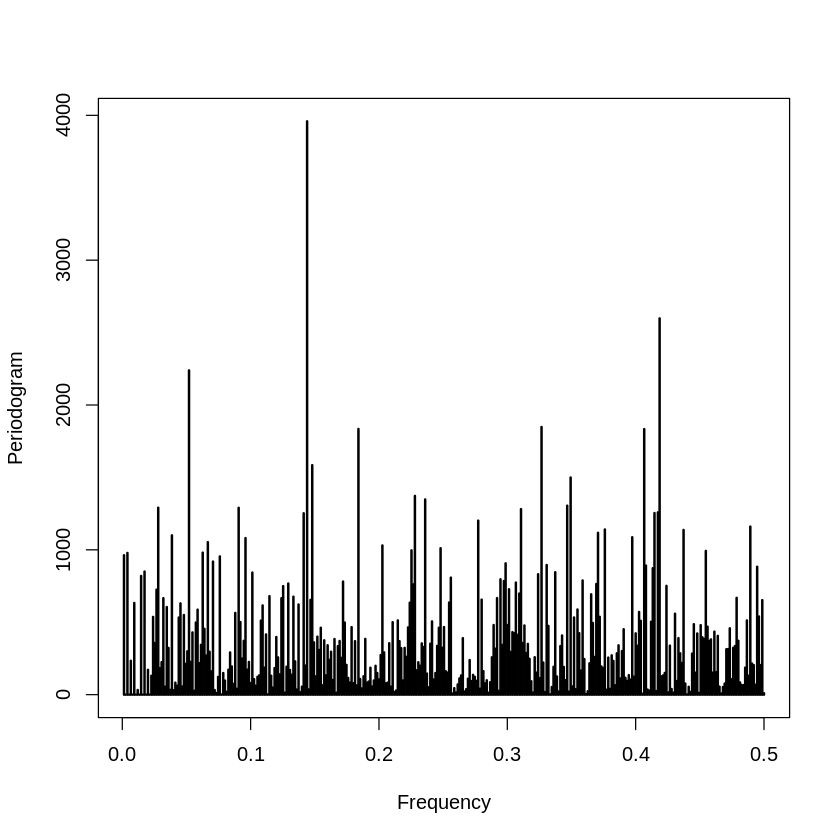

In [19]:
periodogram(aarima_in_train1_fc19$residuals)

### Modeling & Forecasting 3: Auto Arima (Other Variations)

In [77]:
aarima_in_train <- auto.arima(TS_in_train, seasonal=FALSE, xreg = fourier(TS_in_train, K=3))
aarima_out_train <- auto.arima(TS_out_train, seasonal=FALSE, xreg = fourier(TS_out_train, K=3))

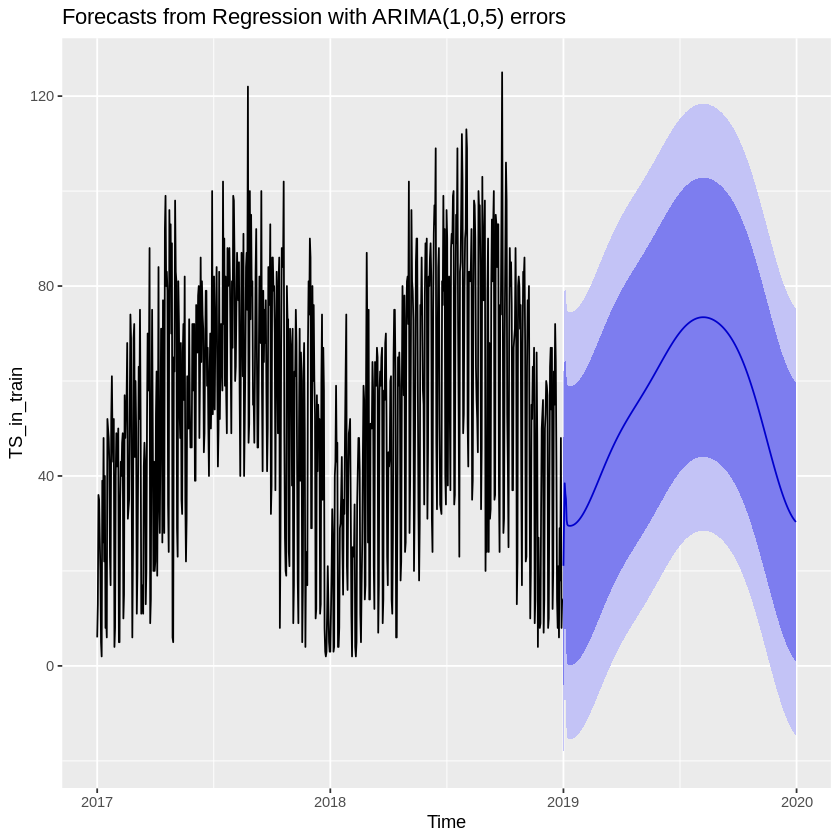

In [78]:
aarima_in_train_fc19 <- forecast(aarima_in_train, h=365, xreg=fourier(TS_in_train, K=3, h=365))
autoplot(aarima_in_train_fc19)

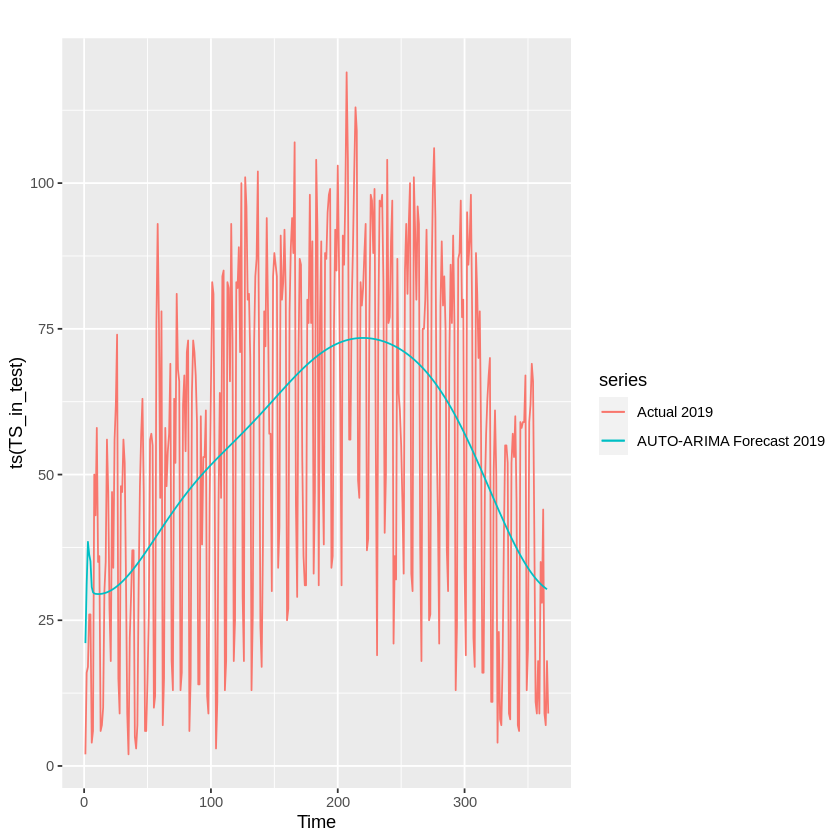

In [79]:
autoplot(ts(TS_in_test), series='Actual 2019') + autolayer(ts(aarima_in_train_fc19$mean), series='AUTO-ARIMA Forecast 2019')

In [80]:
aarima_in_train8 <- auto.arima(TS_in_train, seasonal=FALSE, xreg = fourier(TS_in_train, K=8))
aarima_out_train8 <- auto.arima(TS_out_train, seasonal=FALSE, xreg = fourier(TS_out_train, K=8))

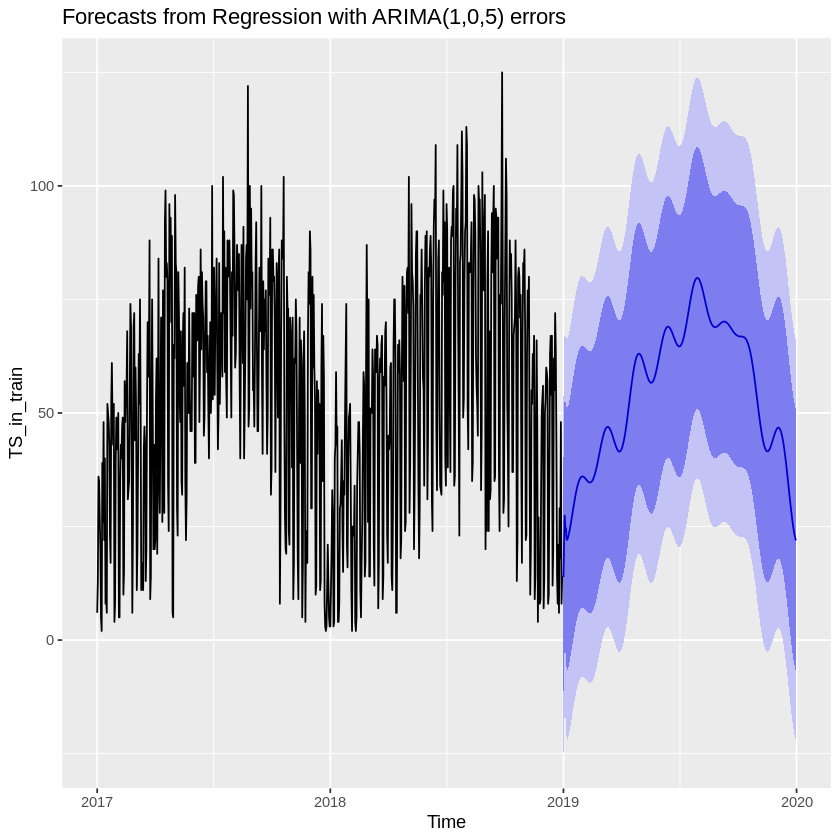

In [81]:
aarima_in_train8_fc19 <- forecast(aarima_in_train8, h=365, xreg=fourier(TS_in_train, K=8, h=365))
autoplot(aarima_in_train8_fc19)

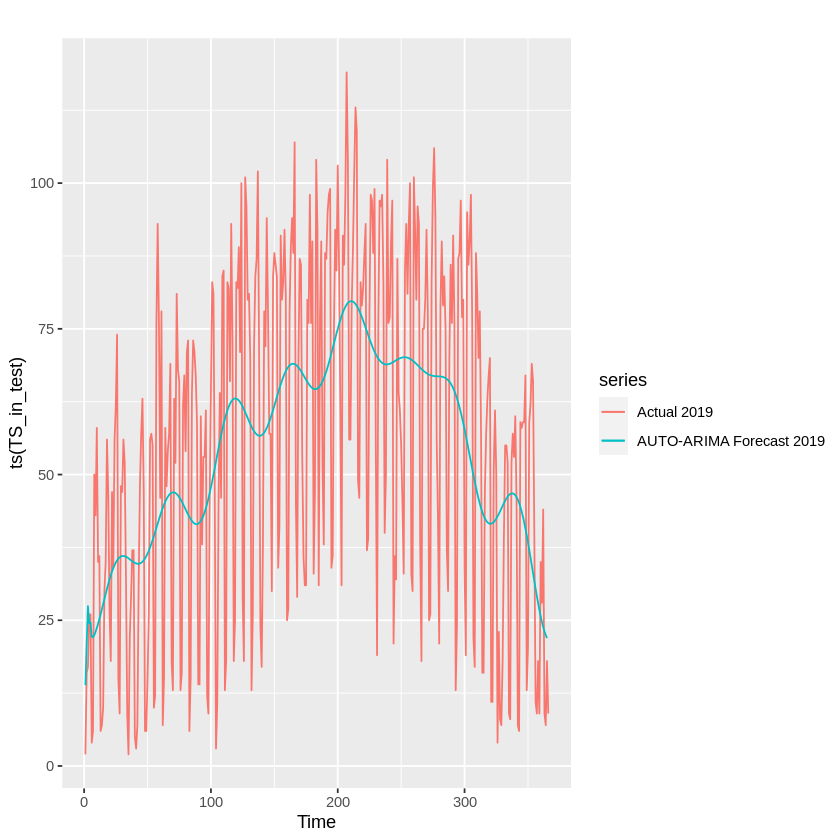

In [82]:
autoplot(ts(TS_in_test), series='Actual 2019') + autolayer(ts(aarima_in_train8_fc19$mean), series='AUTO-ARIMA Forecast 2019')

## Modeling & Forecasting 4: Prophet

### Modeling & Forecasting 4a: Prophet (Half-weekly, Weekly, Yearly)

In [27]:
TS_in_sample_df <- data.frame(df_in_ts[,c('date','Dearborn.St...Monroe.St')])
TS_in_sample_df$date <- as.Date(TS_in_sample_df$date)
TS_in_train_df <- TS_in_sample_df[ (format(TS_in_sample_df$date,format = '%Y')==2017) | (format(TS_in_sample_df$date,format = '%Y')==2018) ,]
colnames(TS_in_train_df)<-c('ds','y')

In [28]:
TS_out_sample_df <- data.frame(df_out_ts[,c('date','Dearborn.St...Monroe.St')])
TS_out_sample_df$date <- as.Date(TS_out_sample_df$date)
TS_out_train_df <- TS_out_sample_df[ (format(TS_out_sample_df$date,format = '%Y')==2017) | (format(TS_out_sample_df$date,format = '%Y')==2018) ,]
colnames(TS_out_train_df)<-c('ds','y')

In [29]:
prophet_wy <- prophet(weekly.seasonality = TRUE, yearly.seasonality = TRUE)
prophet_hwy <- add_seasonality(prophet_wy, name = 'halfweekly', period = 3.5, fourier.order = 1.5)

prophet_in_train_hwy <- fit.prophet(prophet_hwy, TS_in_train_df)
prophet_out_train_hwy <- fit.prophet(prophet_hwy, TS_out_train_df)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Disabling daily seasonality. Run prophet with daily.seasonality=TRUE to override this.

Disabling daily seasonality. Run prophet with daily.seasonality=TRUE to override this.



In [30]:
#summary too long
#prophet_in_train_wy
#summary(prophet_in_train_wy)
#prophet_out_train_wy
#summary(prophet_out_train_wy)

#### Forecasting 4a: Prophet (Half-weekly, Weekly, Yearly)

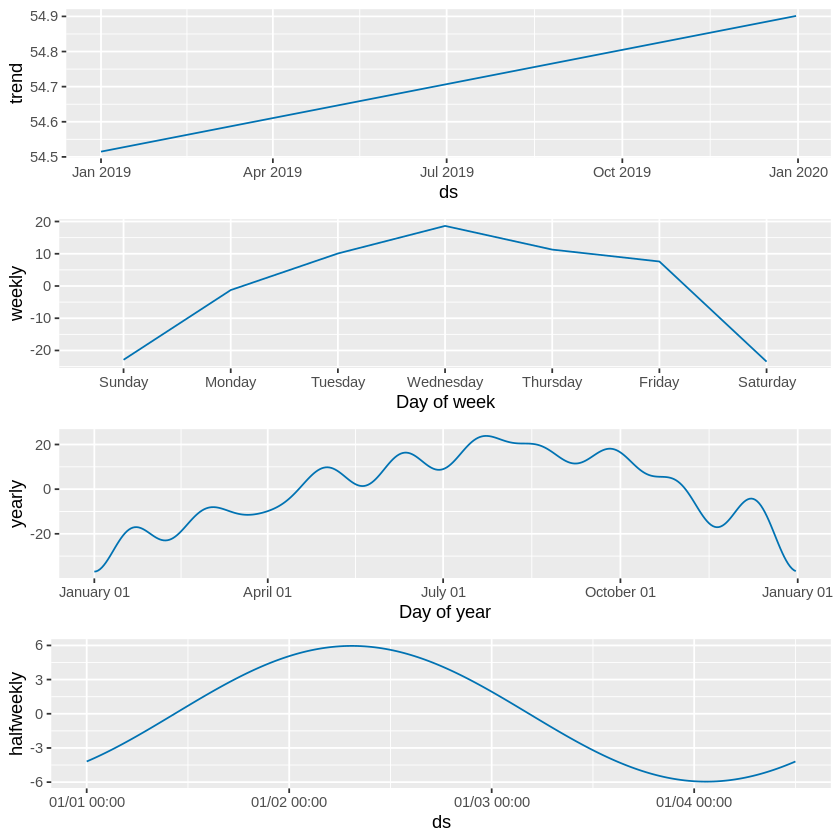

In [33]:
future_in <- make_future_dataframe(prophet_in_train_hwy, periods = 365)
prophet_in_train_hwy_fc19 <- predict(prophet_in_train_hwy,future_in)
prophet_plot_components(prophet_in_train_hwy,prophet_in_train_hwy_fc19[format(prophet_in_train_hwy_fc19$ds,'%Y')==2019,])

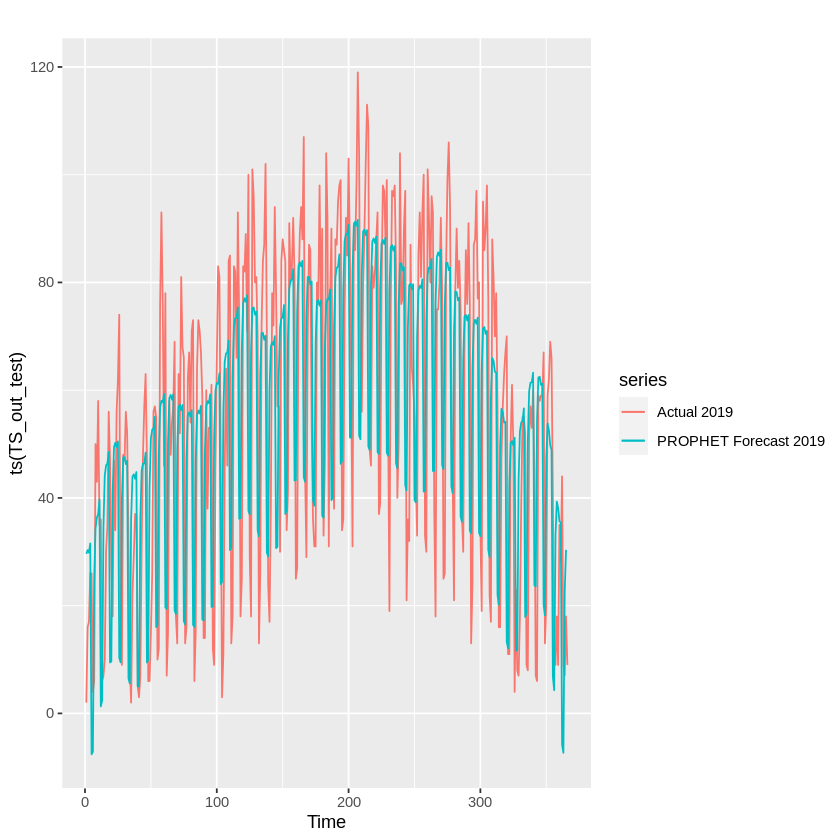

In [34]:
autoplot(ts(TS_out_test), series='Actual 2019') + autolayer(ts(prophet_in_train_hwy_fc19[format(prophet_in_train_hwy_fc19$ds,'%Y')==2019,]$yhat), series='PROPHET Forecast 2019')

In [37]:
head(prophet_in_train_hwy_fc19)

ds         trend    additive_terms additive_terms_lower additive_terms_upper
1 2017-01-01 53.74044 -64.02879      -64.02879            -64.02879           
2 2017-01-02 53.74150 -33.02255      -33.02255            -33.02255           
3 2017-01-03 53.74256 -24.42318      -24.42318            -24.42318           
4 2017-01-04 53.74362 -23.12780      -23.12780            -23.12780           
5 2017-01-05 53.74468 -23.03616      -23.03616            -23.03616           
6 2017-01-06 53.74574 -20.81624      -20.81624            -20.81624           
  halfweekly halfweekly_lower halfweekly_upper weekly     weekly_lower ⋯
1 -4.1888488 -4.1888488       -4.1888488       -22.887402 -22.887402   ⋯
2  5.0604108  5.0604108        5.0604108        -1.260833  -1.260833   ⋯
3  1.9367542  1.9367542        1.9367542        10.086195  10.086195   ⋯
4 -5.9223475 -5.9223475       -5.9223475        18.634870  18.634870   ⋯
5  0.6989384  0.6989384        0.6989384        11.290035  11.290035   ⋯
6  5.6112906  5.6112906        5.6112906         7.597453   7.597453   ⋯
  yearly_lower yearly_upper multiplicative_terms multiplicative_terms_lower
1 -36.95254    -36.95254    0                    0                         
2 -36.82213    -36.82213    0                    0                         
3 -36.44613    -36.44613    0                    0                         
4 -35.84033    -35.84033    0                    0                         
5 -35.02514    -35.02514    0                    0                         
6 -34.02499    -34.02499    0                    0                         
  multiplicative_terms_upper yhat_lower yhat_upper trend_lower trend_upper
1 0                          -27.919504  8.909129  53.74044    53.74044   
2 0                            1.922682 38.787470  53.74150    53.74150   
3 0                            9.989025 47.478061  53.74256    53.74256   
4 0                           12.553510 48.735725  53.74362    53.74362   
5 0                           13.532982 48.963642  53.74468    53.74468   
6 0                           15.183910 50.440937  53.74574    53.74574   
  yhat     
1 -10.28835
2  20.71895
3  29.31938
4  30.61582
5  30.70852
6  32.92950

In [46]:
prophet.residuals <- TS_in_test[1:365]-prophet_in_train_hwy_fc19[format(prophet_in_train_hwy_fc19$ds,'%Y')==2019,]$yhat

Warning message in modeldf.default(object):
“Could not find appropriate degrees of freedom for this model.”


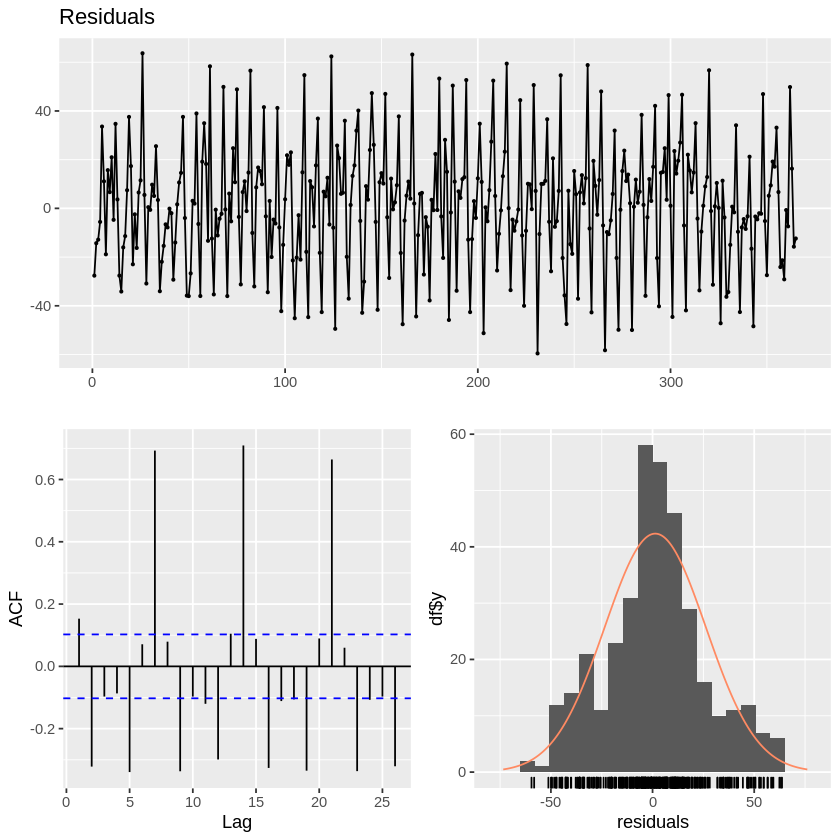

In [47]:
checkresiduals(prophet.residuals)

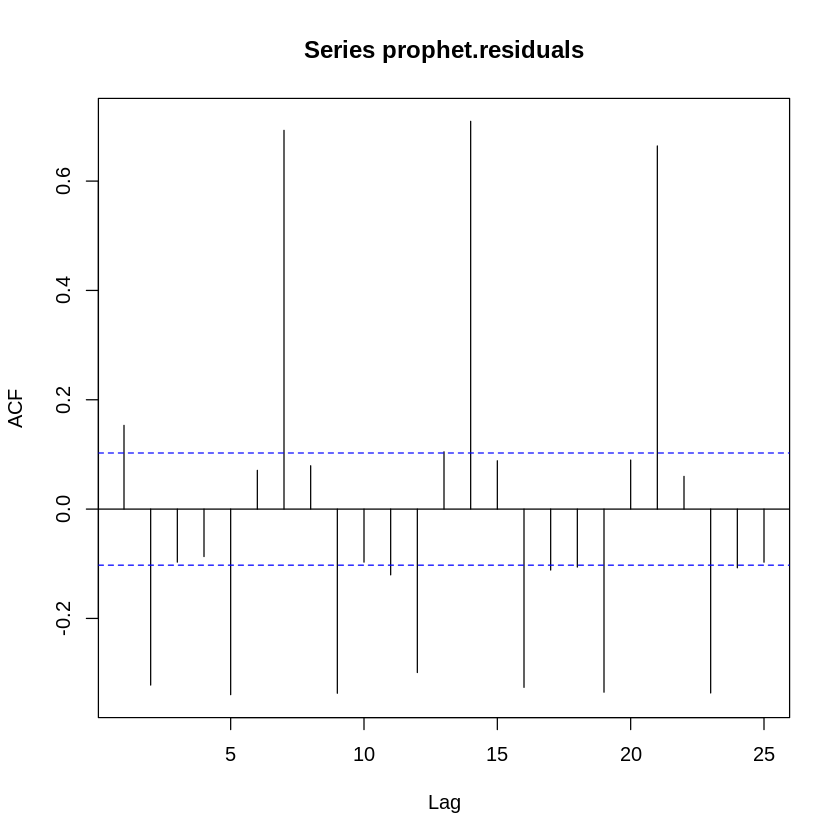

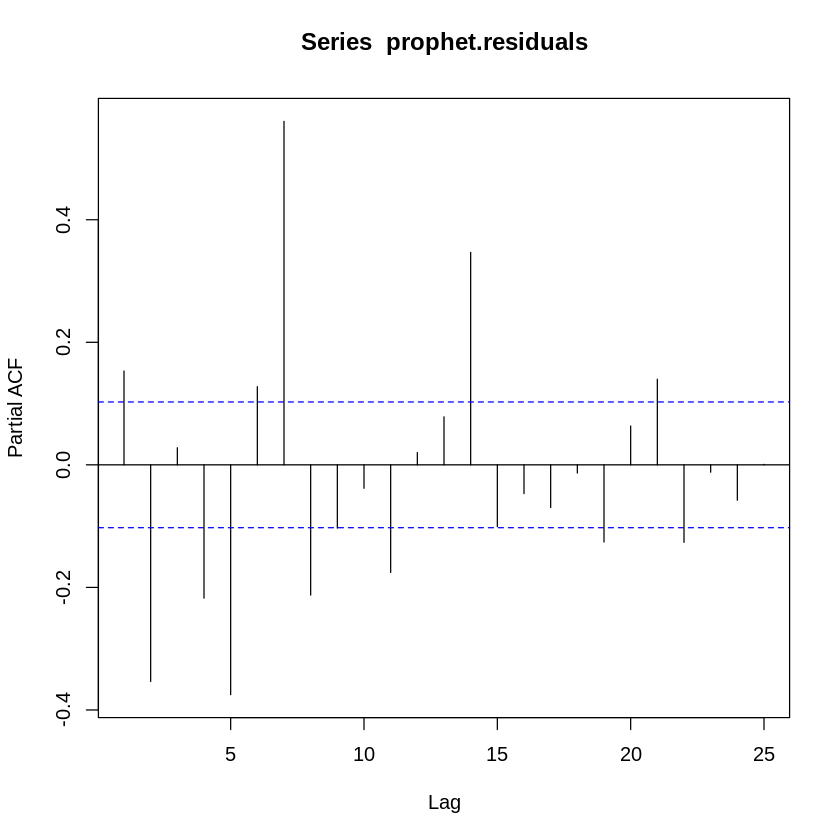

In [48]:
acf(prophet.residuals)
pacf(prophet.residuals)

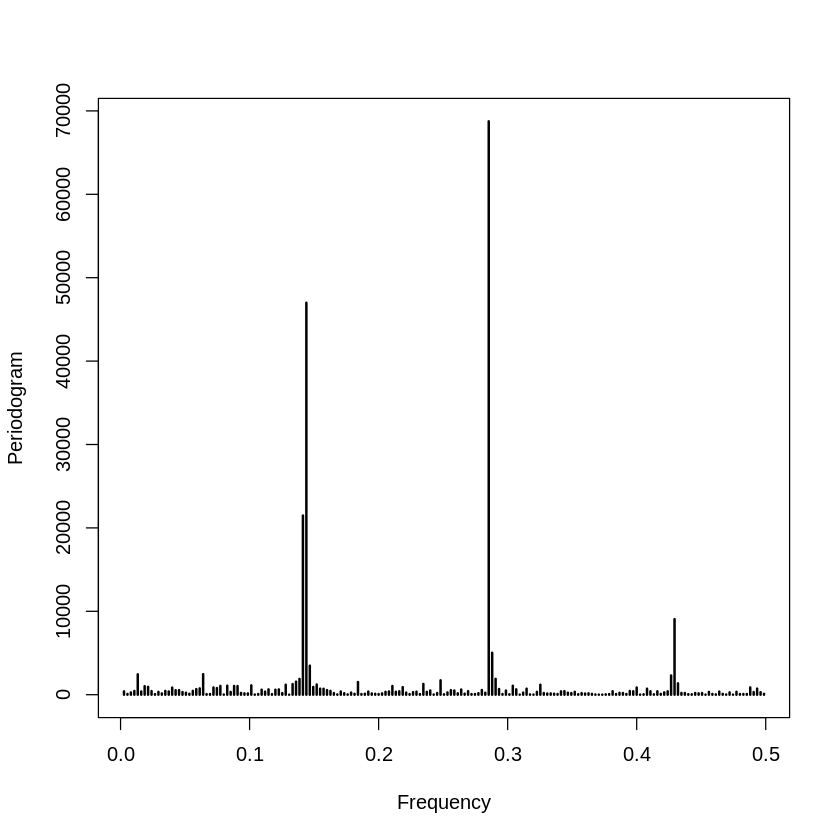

In [49]:
periodogram(prophet.residuals)

#### Modeling & Forecasting 4b: Prophet (Weekly, Yearly)

In [31]:
prophet_in_train_wy <- fit.prophet(prophet_wy, TS_in_train_df)
prophet_out_train_wy <- fit.prophet(prophet_wy, TS_out_train_df)

Disabling daily seasonality. Run prophet with daily.seasonality=TRUE to override this.

Disabling daily seasonality. Run prophet with daily.seasonality=TRUE to override this.



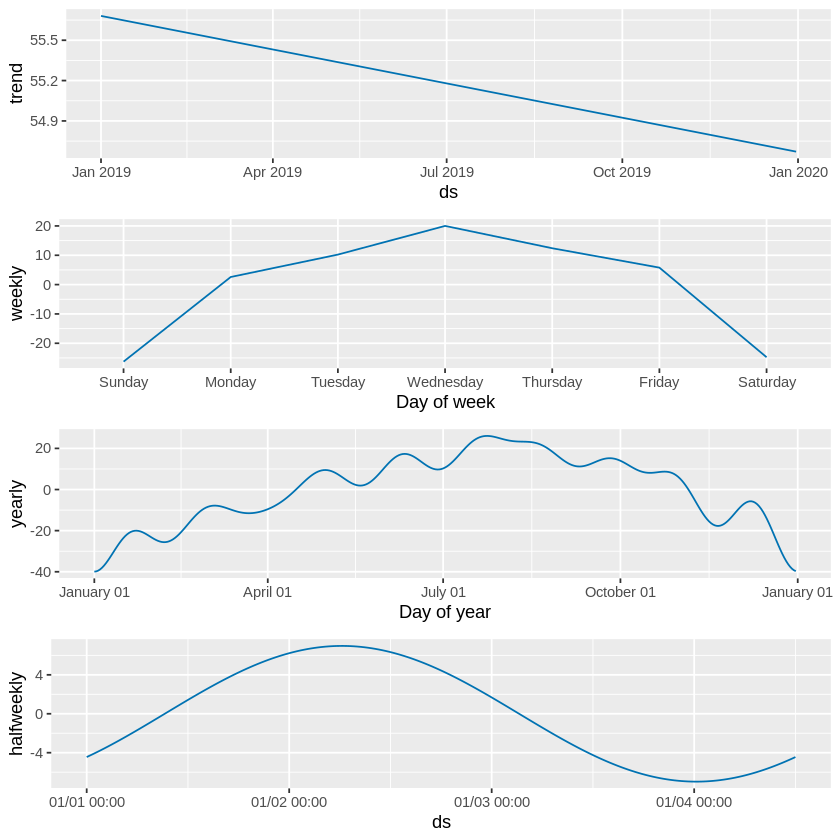

In [ ]:
future_out <- make_future_dataframe(prophet_out_train_hwy, periods = 365)
prophet_out_train_hwy_fc19 <- predict(prophet_out_train_hwy,future_out)
prophet_plot_components(prophet_out_train_hwy,prophet_out_train_hwy_fc19[format(prophet_out_train_hwy_fc19$ds,'%Y')==2019,])

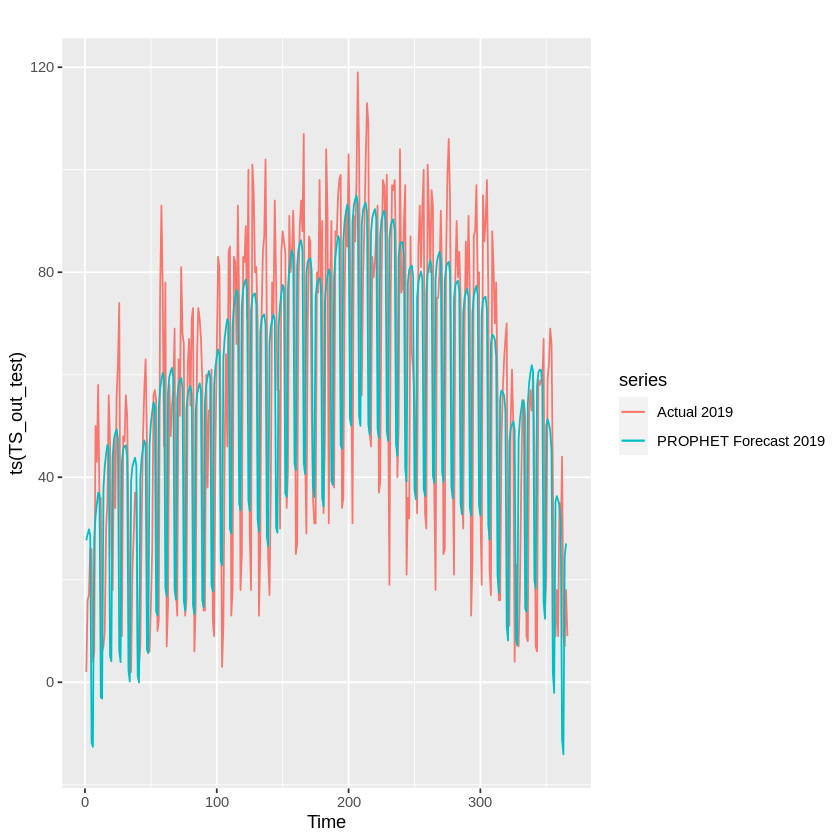

In [ ]:
autoplot(ts(TS_out_test), series='Actual 2019') + autolayer(ts(prophet_out_train_hwy_fc19[format(prophet_out_train_hwy_fc19$ds,'%Y')==2019,]$yhat), series='PROPHET Forecast 2019')

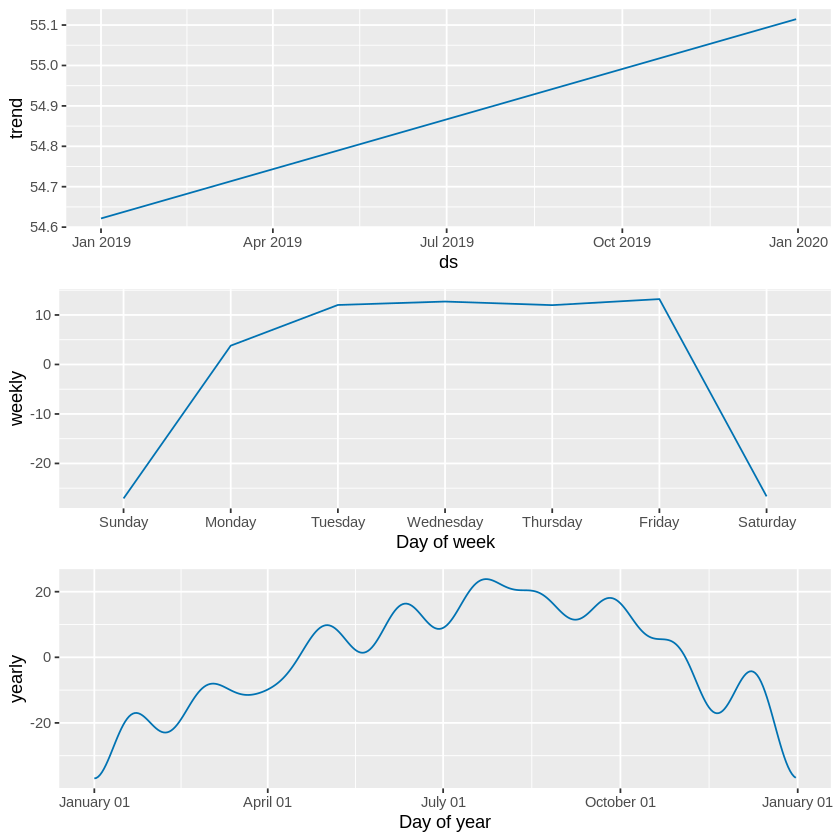

In [32]:
future_in <- make_future_dataframe(prophet_in_train_wy, periods = 365)
prophet_in_train_wy_fc19 <- predict(prophet_in_train_wy,future_in)
prophet_plot_components(prophet_in_train_wy,prophet_in_train_wy_fc19[format(prophet_in_train_wy_fc19$ds,'%Y')==2019,])

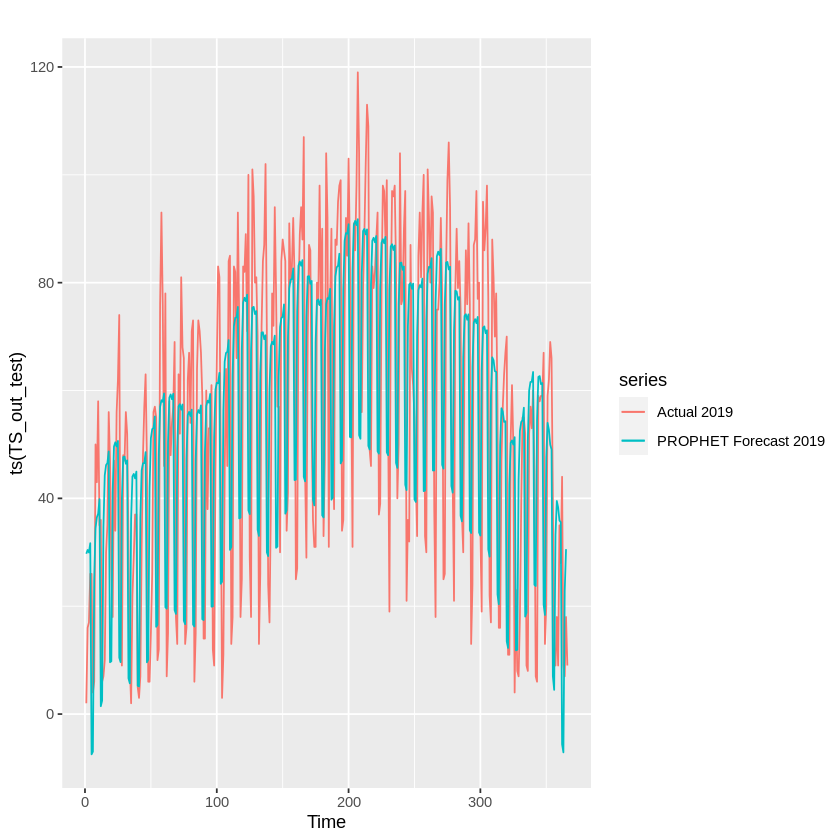

In [ ]:
autoplot(ts(TS_out_test), series='Actual 2019') + autolayer(ts(prophet_in_train_wy_fc19[format(prophet_in_train_wy_fc19$ds,'%Y')==2019,]$yhat), series='PROPHET Forecast 2019')

## Evaluation

In [83]:
print('TBATS (Half-weekly, Weekly, Yearly) Accuracy:')
accuracy(TS_in_test[1:365],tbats_in_train_fc19$mean)
print('TBATS (Weekly, Yearly) Accuracy:')
accuracy(TS_in_test[1:365],tbats_in_train1_fc19$mean)
print('DSHW (Weekly, Yearly) Accuracy:')
accuracy(TS_in_test[1:365],dshw_in_train_wy_fc19$mean)
print('Auto-Arima (Yearly K=8, Weekly K=3) Accuracy:')
accuracy(TS_in_test[1:365],aarima_in_train1_fc19$mean)
print('Auto-Arima (K=3) Accuracy:')
accuracy(TS_in_test[1:365],aarima_in_train_fc19$mean)
print('Auto-Arima (K=8) Accuracy:')
accuracy(TS_in_test[1:365],aarima_in_train8_fc19$mean)
print('Prophet (Half-weekly, Weekly, Yearly) Accuracy:')
accuracy(TS_in_test[1:365],prophet_in_train_hwy_fc19[format(prophet_in_train_hwy_fc19$ds,'%Y')==2019,]$yhat)
print('Prophet (Weekly, Yearly) Accuracy:')
accuracy(TS_in_test[1:365],prophet_in_train_wy_fc19[format(prophet_in_train_wy_fc19$ds,'%Y')==2019,]$yhat)

[1] "TBATS (Half-weekly, Weekly, Yearly) Accuracy:"


ME        RMSE     MAE      MPE       MAPE     ACF1      Theil's U
Test set -7.207978 26.14934 20.63001 -45.91271 119.5336 0.2475894 0.7958925

[1] "TBATS (Weekly, Yearly) Accuracy:"


ME        RMSE     MAE      MPE       MAPE     ACF1      Theil's U
Test set -2.142445 23.28578 18.97309 -6.932426 44.72032 0.3266599 1.755569

[1] "DSHW (Weekly, Yearly) Accuracy:"


ME      RMSE     MAE      MPE       MAPE     ACF1       Theil's U
Test set 6.04653 34.03725 24.47779 -31.25721 72.61358 0.09281662 1.021465

[1] "Auto-Arima (Yearly K=8, Weekly K=3) Accuracy:"


ME        RMSE     MAE      MPE      MAPE     ACF1      Theil's U
Test set -2.355181 25.98899 19.79982 44.49055 121.9293 0.2133417 1.346638

[1] "Auto-Arima (K=3) Accuracy:"


ME        RMSE     MAE      MPE      MAPE    ACF1      Theil's U
Test set -1.922281 25.59914 22.85619 -3.15801 44.8337 0.3756305 17.29709

[1] "Auto-Arima (K=8) Accuracy:"


ME        RMSE     MAE      MPE       MAPE     ACF1      Theil's U
Test set -1.975468 25.34333 22.42414 -3.319795 44.07382 0.3635371 14.56358

[1] "Prophet (Half-weekly, Weekly, Yearly) Accuracy:"


ME        RMSE     MAE      MPE       MAPE    
Test set -1.335039 24.92865 18.99812 -17.05138 61.15166

[1] "Prophet (Weekly, Yearly) Accuracy:"


ME        RMSE     MAE      MPE       MAPE    
Test set -1.175206 24.92085 18.99021 -15.52253 60.06126

In [84]:
# Define SMAPE
smape <- function(act, fc){
  pred <- as.vector(fc)
  sm <- abs(act - pred) / (abs(act) + abs(pred) + 1e-12)
  200 * mean(sm, na.rm=T)
}

In [93]:
print('TBATS (Half-weekly, Weekly, Yearly) SMAPE')
smape(TS_in_test[1:365],tbats_in_train_fc19$mean)
print('TBATS (Weekly, Yearly) SMAPE')
smape(TS_in_test[1:365],tbats_in_train1_fc19$mean)
print('DSHW (Weekly, Yearly) SMAPE')
smape(TS_in_test[1:365],dshw_in_train_wy_fc19$mean)
print('Auto-Arima (Yearly K=8, Weekly K=3) SMAPE')
smape(TS_in_test[1:365],aarima_in_train1_fc19$mean)
print('Auto-Arima (K=3) SMAPE')
smape(TS_in_test[1:365],aarima_in_train_fc19$mean)
print('Auto-Arima (K=8) SMAPE')
smape(TS_in_test[1:365],aarima_in_train8_fc19$mean)
print('Prophet (Half-weekly, Weekly, Yearly) SMAPE')
smape(TS_in_test[1:365],prophet_in_train_hwy_fc19[format(prophet_in_train_hwy_fc19$ds,'%Y')==2019,]$yhat)
print('Prophet (Weekly, Yearly) SMAPE')
smape(TS_in_test[1:365],prophet_in_train_wy_fc19[format(prophet_in_train_wy_fc19$ds,'%Y')==2019,]$yhat)

[1] "TBATS (Half-weekly, Weekly, Yearly) SMAPE"


[1] 52.45808

[1] "TBATS (Weekly, Yearly) SMAPE"


[1] 44.38748

[1] "DSHW (Weekly, Yearly) SMAPE"


[1] 50.46318

[1] "Auto-Arima (Yearly K=8, Weekly K=3) SMAPE"


[1] 47.58097

[1] "Auto-Arima (K=3) SMAPE"


[1] 50.36907

[1] "Auto-Arima (K=8) SMAPE"


[1] 49.41062

[1] "Prophet (Half-weekly, Weekly, Yearly) SMAPE"


[1] 45.75302

[1] "Prophet (Weekly, Yearly) SMAPE"


[1] 45.71423

In [ ]:
print('TBATS (Half-weekly, Weekly, Yearly) SMAPE')
smape(TS_in_test[1:365],tbats_in_train_fc19$mean)
smape(TS_out_test[1:365],tbats_out_train_fc19$mean)
print('TBATS (Weekly, Yearly) SMAPE')
smape(TS_in_test[1:365],tbats_in_train1_fc19$mean)
smape(TS_out_test[1:365],tbats_out_train1_fc19$mean)
print('DSHW (Weekly, Yearly) SMAPE')
smape(TS_in_test[1:365],dshw_in_train_wy_fc19$mean)
smape(TS_out_test[1:365],dshw_out_train_wy_fc19$mean)
print('Auto-Arima (Yearly K=8, Weekly K=3) SMAPE')
smape(TS_in_test[1:365],aarima_in_train1_fc19$mean)
smape(TS_out_test[1:365],aarima_out_train1_fc19$mean)
print('Auto-Arima (K=2) SMAPE')
smape(TS_in_test[1:365],aarima_in_train2_fc19$mean)
smape(TS_out_test[1:365],aarima_out_train2_fc19$mean)
print('Auto-Arima (K=3) SMAPE')
smape(TS_in_test[1:365],aarima_in_train_fc19$mean)
smape(TS_out_test[1:365],aarima_out_train_fc19$mean)
print('Auto-Arima (K=8) SMAPE')
smape(TS_in_test[1:365],aarima_in_train8_fc19$mean)
smape(TS_out_test[1:365],aarima_out_train8_fc19$mean)
print('Prophet (Half-weekly, Weekly, Yearly) SMAPE')
smape(TS_in_test[1:365],prophet_in_train_hwy_fc19[format(prophet_in_train_hwy_fc19$ds,'%Y')==2019,]$yhat)
smape(TS_out_test[1:365],prophet_out_train_hwy_fc19[format(prophet_out_train_hwy_fc19$ds,'%Y')==2019,]$yhat)
print('Prophet (Weekly, Yearly) SMAPE')
smape(TS_in_test[1:365],prophet_in_train_wy_fc19[format(prophet_in_train_wy_fc19$ds,'%Y')==2019,]$yhat)
smape(TS_out_test[1:365],prophet_out_train_wy_fc19[format(prophet_out_train_wy_fc19$ds,'%Y')==2019,]$yhat)

[1] "TBATS (Half-weekly, Weekly, Yearly) SMAPE"


[1] 52.45808

[1] 57.17241

[1] "TBATS (Weekly, Yearly) SMAPE"


[1] 44.38748

[1] 44.80227

[1] "DSHW (Weekly, Yearly) SMAPE"


[1] 50.46318

[1] 49.19417

[1] "Auto-Arima (Yearly K=8, Weekly K=3) SMAPE"


[1] 47.58097

[1] 48.54283

[1] "Auto-Arima (K=2) SMAPE"


[1] 50.49431

[1] 49.08246

[1] "Auto-Arima (K=3) SMAPE"


[1] 50.36907

[1] 48.88596

[1] "Auto-Arima (K=8) SMAPE"


[1] 49.41062

[1] 47.6461

[1] "Prophet (Half-weekly, Weekly, Yearly) SMAPE"


[1] 45.75302

[1] 48.55321

[1] "Prophet (Weekly, Yearly) SMAPE"


[1] 45.71423

[1] 48.57614